#### Dataset: https://lnkd.in/guhhPRe 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\Innomatics Lab\\Pubg.csv")
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.shape

(4446966, 29)

In [4]:
df=df.head(1000000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1000000 non-null  object 
 1   groupId          1000000 non-null  object 
 2   matchId          1000000 non-null  object 
 3   assists          1000000 non-null  int64  
 4   boosts           1000000 non-null  int64  
 5   damageDealt      1000000 non-null  float64
 6   DBNOs            1000000 non-null  int64  
 7   headshotKills    1000000 non-null  int64  
 8   heals            1000000 non-null  int64  
 9   killPlace        1000000 non-null  int64  
 10  killPoints       1000000 non-null  int64  
 11  kills            1000000 non-null  int64  
 12  killStreaks      1000000 non-null  int64  
 13  longestKill      1000000 non-null  float64
 14  matchDuration    1000000 non-null  int64  
 15  matchType        1000000 non-null  object 
 16  maxPlace         10

In [6]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [7]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [8]:
# Deleting unnecessary columns

df.drop(['Id', 'groupId', 'matchId'],axis=1,inplace=True)

## Univariate Analysis

### Analysing assists
- assists - Number of enemy players this player damaged that were killed by teammates.

In [9]:
df['assists'].describe()

count    1000000.000000
mean           0.233028
std            0.587961
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           21.000000
Name: assists, dtype: float64

In [10]:
# Getting the unique values

df['assists'].unique()

array([ 0,  1,  3,  2,  4,  6,  5,  8,  9,  7, 13, 11, 12, 21, 10, 20, 14],
      dtype=int64)

In [11]:
# Getting the count of unique values

df['assists'].value_counts()

0     825239
1     132878
2      30600
3       8045
4       2197
5        641
6        204
7        110
8         35
9         16
10        13
11        11
12         6
13         2
20         1
14         1
21         1
Name: assists, dtype: int64

<AxesSubplot:xlabel='assists', ylabel='count'>

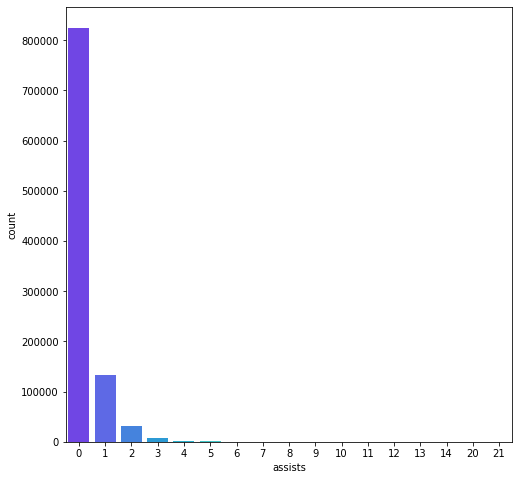

In [12]:
# Plotting the countplot of assist

plt.figure(figsize=(8,8))
sns.countplot(x=df['assists'],palette='rainbow')

- No assist accounts for 82.49494936774899% of the whole data.
- Mostly there were 0 or 1 assists which accounts 95.78805154433313% of the whole data.

In [13]:
print(f"% of no assists are: {df['assists'].value_counts()[0]/df['assists'].shape[0]*100}%")
print(f"% of no assists are: {(df['assists'].value_counts()[0]+df['assists'].value_counts()[1])/df['assists'].shape[0]*100}%")

% of no assists are: 82.5239%
% of no assists are: 95.8117%


<Figure size 576x576 with 0 Axes>

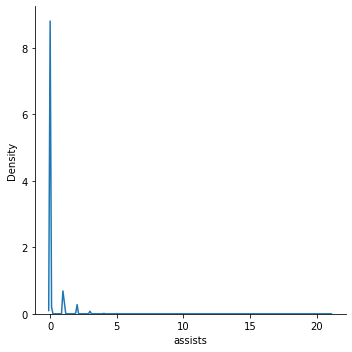

In [14]:
#plotting displot ot check normality

plt.figure(figsize=(8,8))
sns.displot(x=df['assists'],kind='kde')

- The dsitribution looks like log distribution

In [15]:
def iqr(df):
    outlier=[]
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    print('Lower limit: ',lower)
    print("Upper limit: ",upper)
    for i in df:
        if i>upper or i< lower:
            outlier.append(i)
    return outlier

<AxesSubplot:ylabel='assists'>

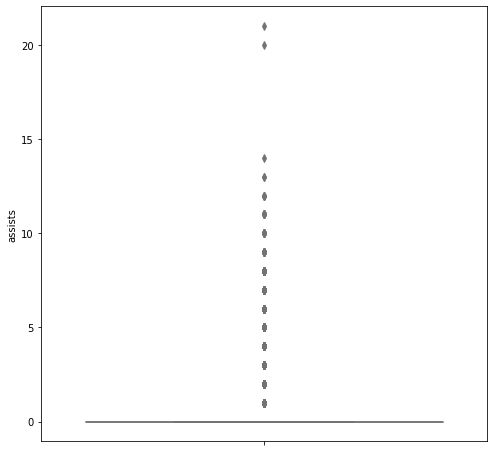

In [16]:
#plotting boxplot to detect outlier

plt.figure(figsize=(8,8))
sns.boxplot(y=df['assists'],palette='rainbow')

- 1)There are 196611 outliers in the data
- 2)Percentage of outliers of total data is 0.17505050632251007%

In [17]:
assist_outlier=iqr(df['assists'])
print(len(assist_outlier))

Lower limit:  0.0
Upper limit:  0.0
174761


In [18]:
#Dropping outliers

df['assists']=df[df['assists']<2]

In [20]:
# Filling missing values with median values

df['assists'].replace(np.nan,df['assists'].median(),inplace=True)

<AxesSubplot:ylabel='assists'>

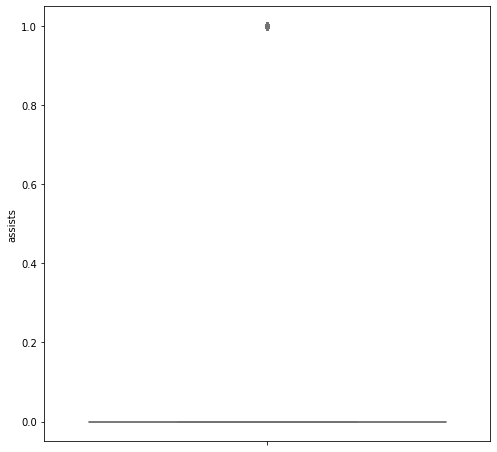

In [22]:
#plotting boxplot to detect outlier

plt.figure(figsize=(8,8))
sns.boxplot(y=df['assists'],palette='rainbow')

Now there are no outliers in the data.

In [23]:
df['assists'].isnull().sum()

0

<AxesSubplot:xlabel='assists', ylabel='count'>

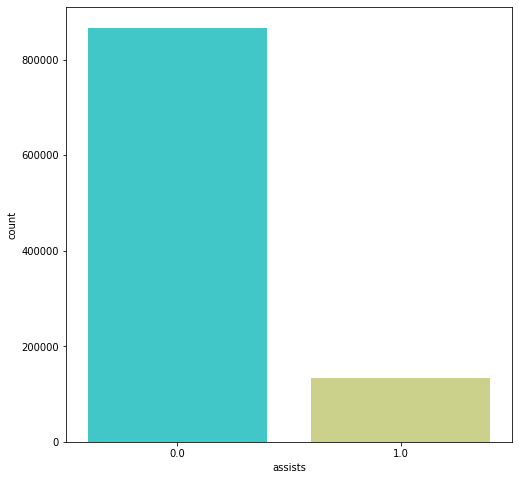

In [24]:
#Plotting the countplot after all  cleaning and preprocessing

plt.figure(figsize=(8,8))
sns.countplot(x=df['assists'],palette='rainbow')

After cleaning the data['assist'] column this is what countplot looks like, which tells us that:-

Most of the people have killed the enemy themselves without any assist

In [25]:
df['assists'].value_counts()

0.0    867122
1.0    132878
Name: assists, dtype: int64

### Analysing boosts
boosts - Number of boost items used

In [26]:
df['boosts'].describe()

count    1000000.000000
mean           1.107857
std            1.716005
min            0.000000
25%            0.000000
50%            0.000000
75%            2.000000
max           33.000000
Name: boosts, dtype: float64

In [27]:
df['boosts'].unique()

array([ 0,  1,  2,  3,  4,  6,  5,  9,  7,  8, 11, 10, 13, 14, 12, 21, 15,
       20, 16, 17, 33, 19, 18], dtype=int64)

In [28]:
df['boosts'].isnull().sum()

0

In [29]:
df['boosts'].value_counts()

0     566556
1     153195
2     110284
3      66887
4      44086
5      27016
6      15746
7       8576
8       4225
9       1889
10       869
11       370
12       164
13        62
14        36
15        14
16        10
17         5
18         3
21         2
19         2
20         2
33         1
Name: boosts, dtype: int64

<AxesSubplot:xlabel='boosts', ylabel='count'>

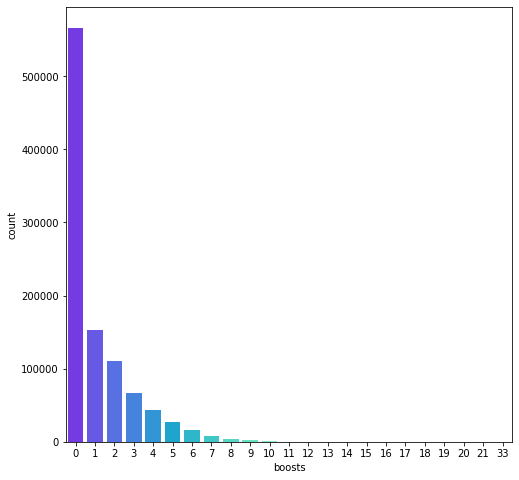

In [30]:
#plotting countplot for visvalizing the value counts

plt.figure(figsize=(8,8))
sns.countplot(x=df['boosts'],palette='rainbow')

<Figure size 576x576 with 0 Axes>

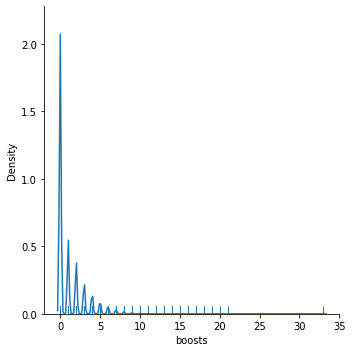

In [31]:
#Plotting displot to type distribution

plt.figure(figsize=(8,8))
sns.displot(x=df['boosts'],kind='kde',rug=True)

<AxesSubplot:ylabel='boosts'>

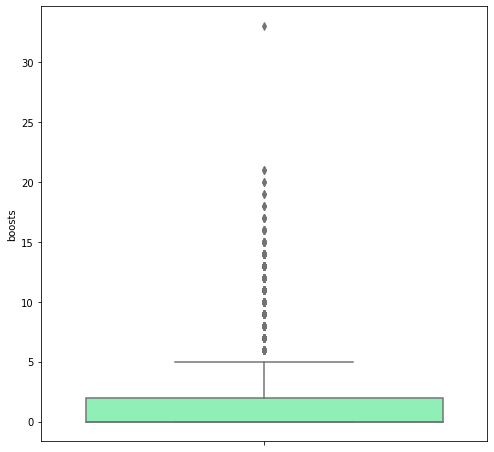

In [32]:
# Plotting boxplot to find outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=df['boosts'],palette='rainbow')

In [34]:
boost_outliers=iqr(df['boosts'])
print(len(boost_outliers))
print(min(boost_outliers))
print(max(boost_outliers))
print("Percentage of outliers of total data is {}%".format(len(boost_outliers)/df['boosts'].shape[0]))

Lower limit:  -3.0
Upper limit:  5.0
31976
6
33
Percentage of outliers of total data is 0.031976%


In [35]:
# Removing outliers form the boost column

df['boosts']=df[(df['boosts']>-3.0) & df['boosts']<5.0]

<AxesSubplot:ylabel='boosts'>

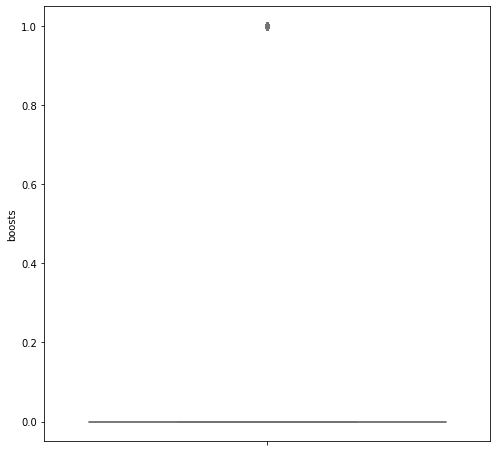

In [36]:
# Plotting boxplot to find outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=df['boosts'],palette='rainbow')

No otuliers in the boost column can be seen

In [37]:
df['boosts'].isnull().sum()

0

In [38]:
# Filling al the null values with median values

df['boosts'].replace(np.nan,df['boosts'].mean(),inplace=True)

In [39]:
df['boosts'].isnull().sum()

0

<AxesSubplot:xlabel='boosts', ylabel='count'>

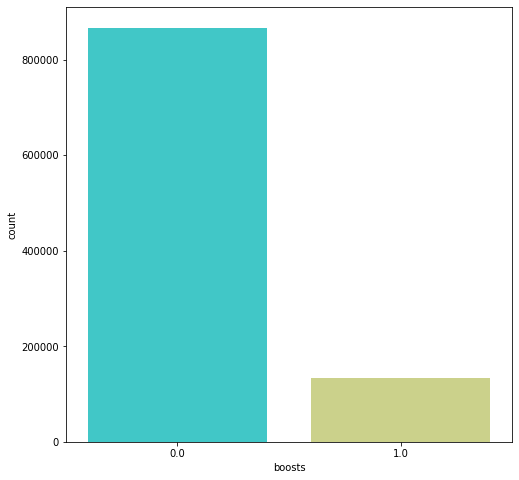

In [40]:
#plotting countplot for visvalizing the value counts

plt.figure(figsize=(8,8))
sns.countplot(x=df['boosts'],palette='rainbow')

- Most of the people have not used any boosts
- Some have used only one boost.

In [41]:
df['boosts'].value_counts()

0.0    867122
1.0    132878
Name: boosts, dtype: int64

### Analysing danage dealt¶
damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

In [43]:
df['damageDealt'].describe()

count    1000000.000000
mean         130.904837
std          171.353334
min            0.000000
25%            0.000000
50%           84.380000
75%          186.200000
max         6616.000000
Name: damageDealt, dtype: float64

In [44]:
df['damageDealt'].unique().shape

(23331,)

<Figure size 576x576 with 0 Axes>

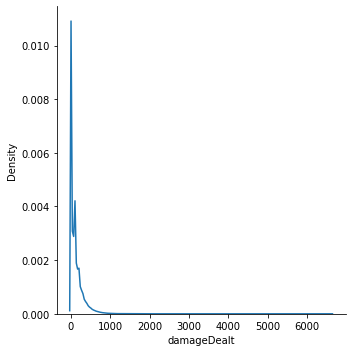

In [45]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['damageDealt'],kind='kde',palette='rainbow')

Looks like log distribution.

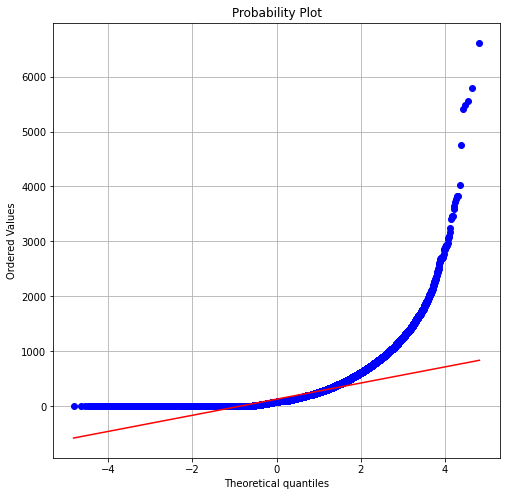

In [46]:
plt.figure(figsize=(8,8))
stats.probplot(x=df['damageDealt'],dist='norm',plot=plt)
plt.grid()

<AxesSubplot:ylabel='damageDealt'>

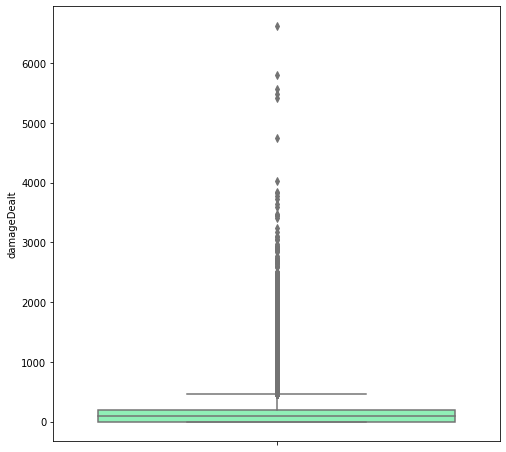

In [47]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['damageDealt'],palette='rainbow')

In [48]:
iqr(df['damageDealt'])

Lower limit:  -279.29999999999995
Upper limit:  465.49999999999994


[1011.0,
 558.6,
 529.3,
 560.8,
 467.8,
 566.4,
 604.7,
 626.2,
 569.2,
 778.0,
 529.8,
 497.9,
 902.5,
 629.0,
 491.6,
 1101.0,
 1120.0,
 500.1,
 522.0,
 571.0,
 568.7,
 561.4,
 466.1,
 704.1,
 479.0,
 476.5,
 1563.0,
 520.2,
 502.3,
 544.0,
 521.3,
 853.1,
 549.2,
 966.8,
 553.1,
 817.0,
 704.9,
 488.4,
 800.7,
 542.9,
 494.2,
 623.7,
 1036.0,
 481.3,
 695.3,
 784.5,
 743.1,
 606.7,
 938.2,
 723.9,
 714.4,
 689.9,
 471.7,
 523.9,
 739.8,
 576.8,
 495.1,
 634.5,
 1750.0,
 751.9,
 655.2,
 722.8,
 919.5,
 621.9,
 792.2,
 503.3,
 527.9,
 482.1,
 682.3,
 527.9,
 481.6,
 480.2,
 711.8,
 600.0,
 482.8,
 538.7,
 813.6,
 528.6,
 509.5,
 1028.0,
 540.7,
 542.9,
 609.8,
 620.3,
 717.7,
 886.5,
 722.4,
 550.8,
 486.7,
 565.3,
 564.3,
 651.8,
 571.7,
 593.0,
 1228.0,
 1018.0,
 744.8,
 658.7,
 646.4,
 577.6,
 1039.0,
 563.0,
 473.2,
 523.7,
 845.7,
 1008.0,
 504.8,
 542.0,
 749.0,
 873.1,
 557.8,
 680.7,
 593.2,
 642.6,
 805.3,
 539.4,
 577.6,
 515.0,
 500.3,
 491.7,
 1098.0,
 546.6,
 642.9,
 493

In [49]:
df['damageDealt']=df[(df['damageDealt']>-278.85) & (df['damageDealt']<464.75)]

In [50]:
df['damageDealt'].fillna(df['damageDealt'].median(),inplace=True)

<AxesSubplot:ylabel='damageDealt'>

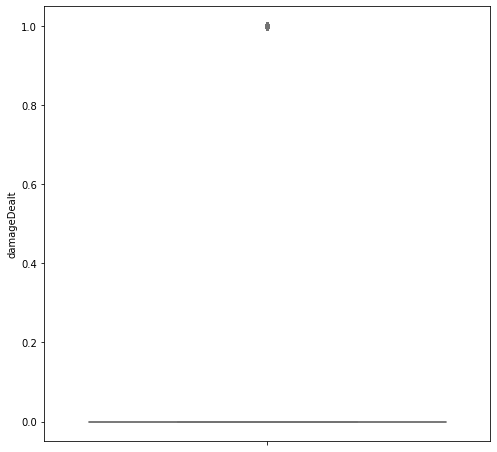

In [51]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['damageDealt'],palette='rainbow')

In [52]:
df['damageDealt'].value_counts()

0.0    881380
1.0    118620
Name: damageDealt, dtype: int64

<AxesSubplot:xlabel='damageDealt', ylabel='count'>

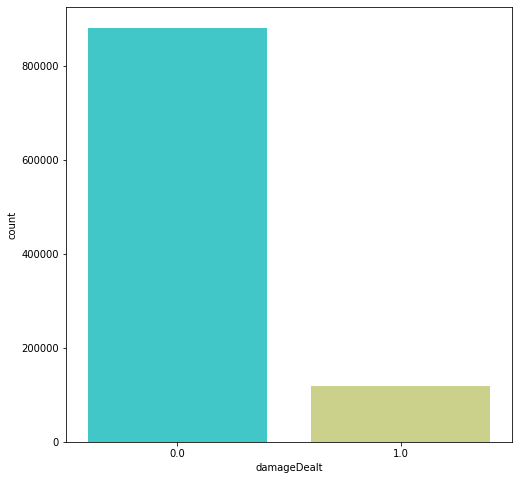

In [53]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['damageDealt'],palette='rainbow')

After cleaning the whole dataset it is bieng found that most of the peole have 0 and 1 damage.

<Figure size 576x576 with 0 Axes>

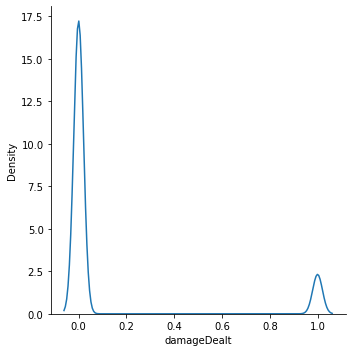

In [54]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['damageDealt'],kind='kde',palette='rainbow')

Distribution plot after cleaing the data.

### Analysing DBNOs
Number of enemy players knocked.

In [55]:
df['DBNOs'].describe()

count    1000000.000000
mean           0.658511
std            1.147257
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           38.000000
Name: DBNOs, dtype: float64

In [56]:
df['DBNOs'].isnull().sum()

0

In [57]:
df['DBNOs'].unique()

array([ 0,  1,  6,  4,  3,  2,  5, 10,  8,  7,  9, 13, 21, 12, 11, 19, 32,
       18, 24, 22, 20, 14, 15, 26, 17, 16, 25, 27, 23, 33, 38, 30],
      dtype=int64)

In [58]:
df['DBNOs'].value_counts()

0     623743
1     221061
2      88722
3      36612
4      15633
5       7139
6       3386
7       1680
8        821
9        476
10       241
11       156
12       112
13        57
14        44
15        35
17        14
18        14
16        10
20         8
21         8
19         7
24         4
26         4
25         3
22         2
23         2
27         2
33         1
30         1
32         1
38         1
Name: DBNOs, dtype: int64

<AxesSubplot:xlabel='DBNOs', ylabel='count'>

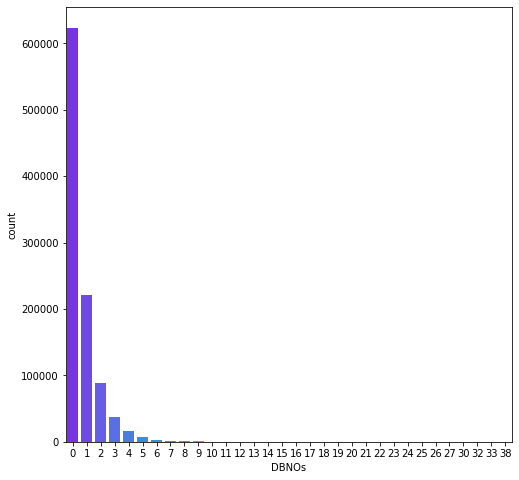

In [59]:
#plotting the countpot

plt.figure(figsize=(8,8))
sns.countplot(x=df['DBNOs'],palette='rainbow')

- From the data it is cleat that 62.39514203835063% of the people have not knocked anyone.
- Around 22.130314407479435 % of the people have knocked only 1 enemy.
- Maximum enemy knocked by a person is 35.

In [60]:
player_kill_0=df['DBNOs'].value_counts()[0]/df['DBNOs'].shape[0]*100
player_kill_1=df['DBNOs'].value_counts()[1]/df['DBNOs'].shape[0]*100
print(f'% of knocked 0 enemy are:{player_kill_0}%')
print(f'% of knocked 1 enemy are:{player_kill_1}%')

% of knocked 0 enemy are:62.374300000000005%
% of knocked 1 enemy are:22.1061%


<Figure size 576x576 with 0 Axes>

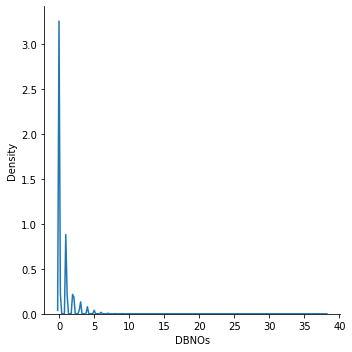

In [61]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['DBNOs'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='DBNOs'>

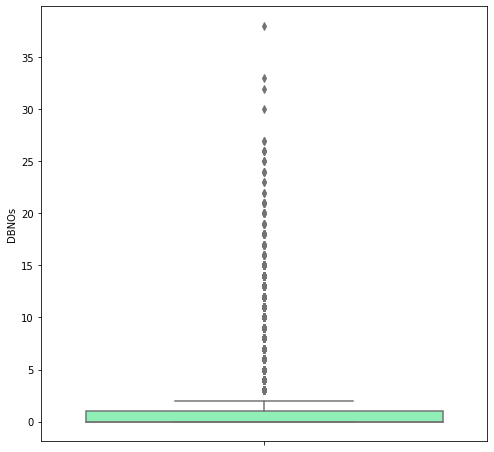

In [62]:
#Plot box plot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['DBNOs'],palette='rainbow')

In [63]:
len(iqr(df['DBNOs']))

Lower limit:  -1.5
Upper limit:  2.5


66474

In [64]:
#Removing the outliers

df['DBNOs']=df[(df['DBNOs']>-1.5) & (df['DBNOs']<2.5)]

In [65]:
df['DBNOs'].unique()

array([0.0, 1.0, nan], dtype=object)

In [66]:
df['DBNOs'].fillna(df['DBNOs'].median(),inplace=True)

<AxesSubplot:ylabel='DBNOs'>

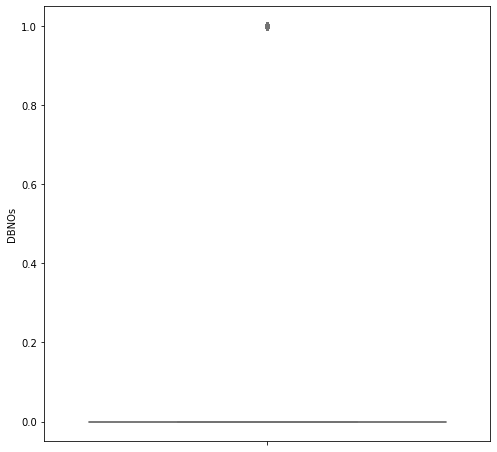

In [67]:
#Plot box plot after cleaning

plt.figure(figsize=(8,8))
sns.boxplot(y=df['DBNOs'],palette='rainbow')

<Figure size 576x576 with 0 Axes>

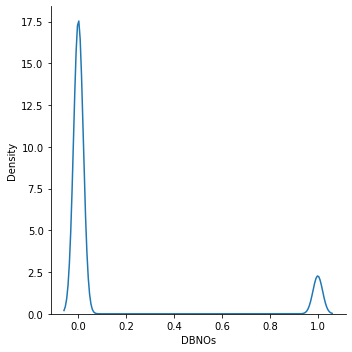

In [68]:
#Plotting the displot after cleaning

plt.figure(figsize=(8,8))
sns.displot(x=df['DBNOs'],kind='kde',palette='rainbow')

### Analysing headshotkills
Number of enemy players killed with headshots.

In [69]:
df['headshotKills'].describe()

count    1000000.000000
mean           0.226969
std            0.599452
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           40.000000
Name: headshotKills, dtype: float64

In [70]:
df['headshotKills'].unique()

array([ 0,  1,  2,  3,  6,  4,  5,  8,  9,  7, 17, 10, 14, 12, 40, 11, 13,
       15, 16, 18, 27, 19], dtype=int64)

In [71]:
df['headshotKills'].value_counts()

0     830846
1     129638
2      28290
3       7467
4       2231
5        815
6        316
7        176
8         86
9         40
10        37
11        18
12        12
13         5
14         5
15         5
16         5
17         3
18         2
27         1
19         1
40         1
Name: headshotKills, dtype: int64

<AxesSubplot:xlabel='headshotKills', ylabel='count'>

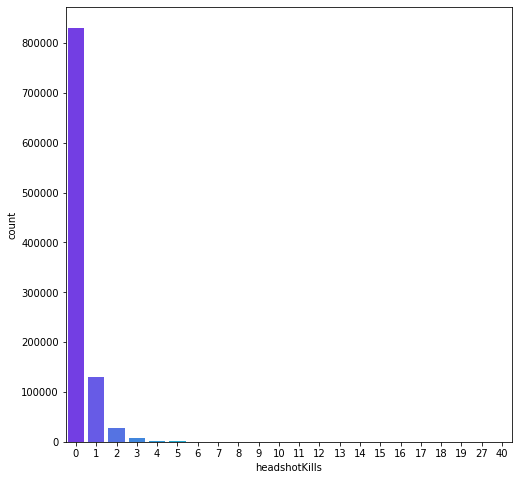

In [72]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['headshotKills'],palette='rainbow')

- 83.09589814903097 % have not killed anyone by headshot.
- 12.958762014927924 % have got only one headshot.
- Maximum headshot a person got is 64

In [73]:
headshot_0=df['headshotKills'].value_counts()[0]/df['headshotKills'].shape[0]*100
headshot_1=df['headshotKills'].value_counts()[1]/df['headshotKills'].shape[0]*100
print(f"% of 0 headshot kills by people are: {headshot_0} %")
print(f"% if 1 headshot kills by people are: {headshot_1} %")

% of 0 headshot kills by people are: 83.0846 %
% if 1 headshot kills by people are: 12.9638 %


<Figure size 576x576 with 0 Axes>

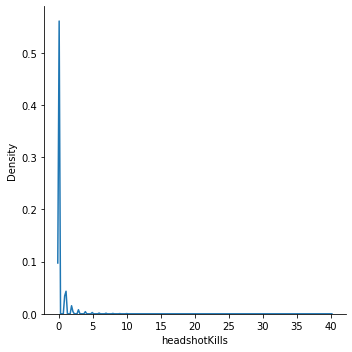

In [74]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['headshotKills'],kind='kde',palette='rainbow')


<AxesSubplot:ylabel='headshotKills'>

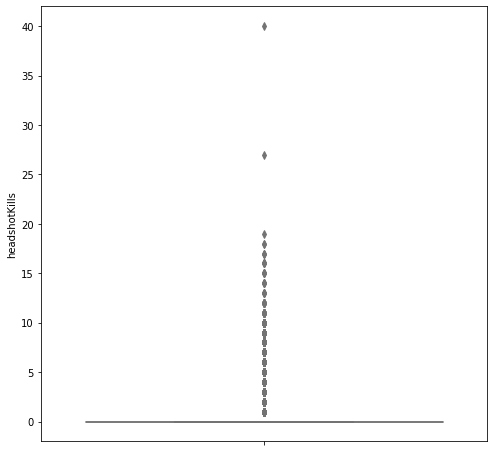

In [75]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['headshotKills'],palette='rainbow')

In [76]:
iqr(df['headshotKills'])

Lower limit:  0.0
Upper limit:  0.0


[1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 6,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [77]:
df['headshotKills']=df[(df['headshotKills']>=0) & (df['headshotKills']<=0)]

In [78]:
df['headshotKills'].unique()

array([0.0, 1.0, nan], dtype=object)

In [79]:
df['headshotKills'].fillna(df['headshotKills'].median(),inplace=True)

<AxesSubplot:ylabel='headshotKills'>

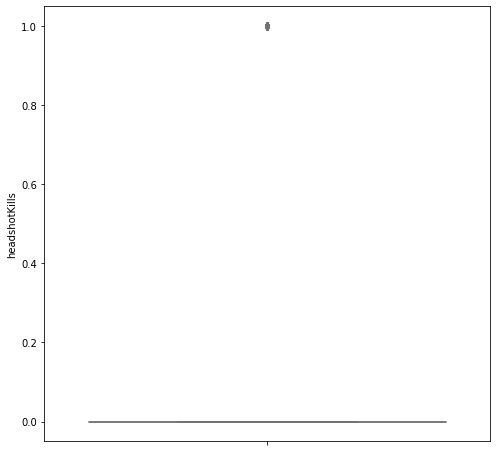

In [80]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['headshotKills'],palette='rainbow')

We have treated approx. all the outliers.

<AxesSubplot:xlabel='headshotKills', ylabel='count'>

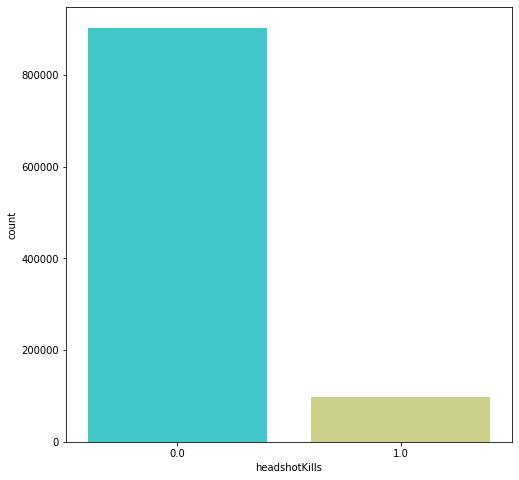

In [81]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['headshotKills'],palette='rainbow')

After cleaning the data it is clear that most of the people have got only o or 1 headshot.

<Figure size 576x576 with 0 Axes>

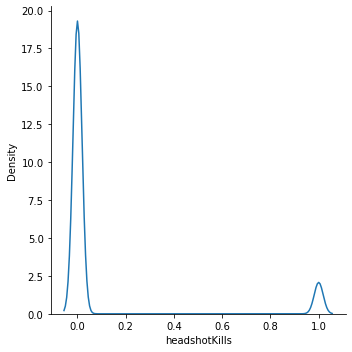

In [82]:
#plotting the displot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=df['headshotKills'],kind='kde',palette='rainbow')

In [83]:
df['headshotKills'].value_counts()[0]

903159

### Analysing heals
Number of healing items used.

In [84]:
df['heals'].describe()

count    1000000.000000
mean           1.368747
std            2.675399
min            0.000000
25%            0.000000
50%            0.000000
75%            2.000000
max           63.000000
Name: heals, dtype: float64

In [85]:
df['heals'].unique()

array([ 0,  5,  2, 14, 12,  1,  8,  3,  4,  6,  9, 13,  7, 24, 10, 15, 25,
       11, 18, 17, 20, 16, 29, 23, 19, 21, 22, 27, 28, 32, 47, 26, 31, 30,
       43, 33, 37, 34, 38, 52, 35, 42, 48, 40, 41, 44, 39, 45, 36, 61, 46,
       57, 63], dtype=int64)

In [86]:
df['heals'].value_counts()

0     595647
1     151293
2      71844
3      45485
4      32174
5      30271
6      19773
7      14571
8       9633
9       6699
10      5730
11      4189
12      2994
13      2305
14      1647
15      1327
16      1040
17       749
18       528
19       426
20       365
21       283
22       223
23       172
24       115
26        91
25        88
27        83
28        47
30        34
29        31
31        24
33        18
32        17
34        17
35        14
37        13
39         6
42         5
36         4
41         3
38         3
40         3
48         3
43         2
44         2
45         2
47         2
52         1
57         1
61         1
46         1
63         1
Name: heals, dtype: int64

<AxesSubplot:xlabel='heals', ylabel='count'>

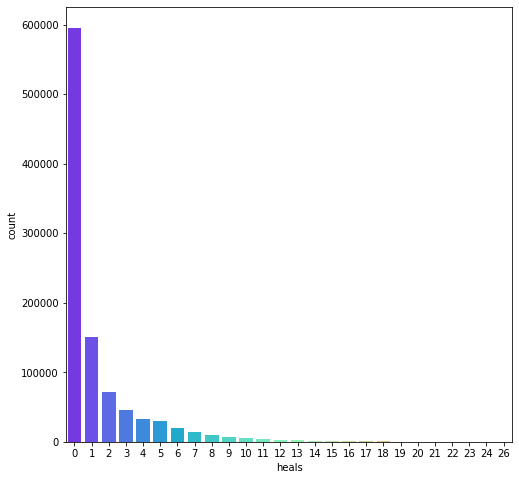

In [87]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['heals'],palette='rainbow',order=df['heals'].value_counts().iloc[:26].index)

<AxesSubplot:xlabel='heals', ylabel='count'>

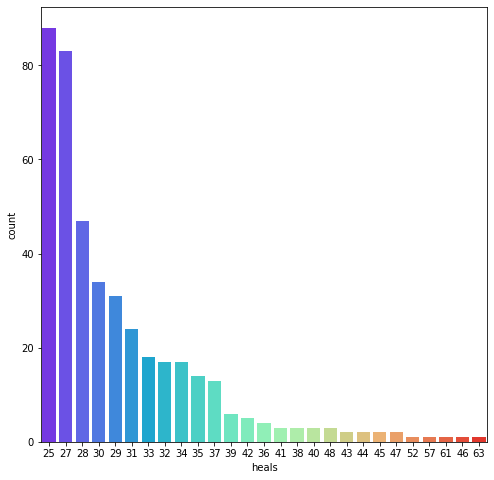

In [88]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['heals'],palette='rainbow',order=df['heals'].value_counts().iloc[26:].index)

- Maximum heals used by a person is 73.
- % of people have used 0 heals are: 59.5687668541802%
- % of people have used 1 heals are: 15.137954669338749%

In [89]:
heals_0=df['heals'].value_counts()[0]/df['heals'].shape[0]*100
heals_1=df['heals'].value_counts()[1]/df['heals'].shape[0]*100
print(f"% of people have used 0 heals are: {heals_0}%")
print(f"% of people have used 1 heals are: {heals_1}%")

% of people have used 0 heals are: 59.5647%
% of people have used 1 heals are: 15.1293%


<Figure size 576x576 with 0 Axes>

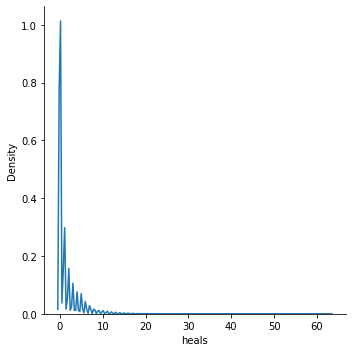

In [90]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['heals'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='heals'>

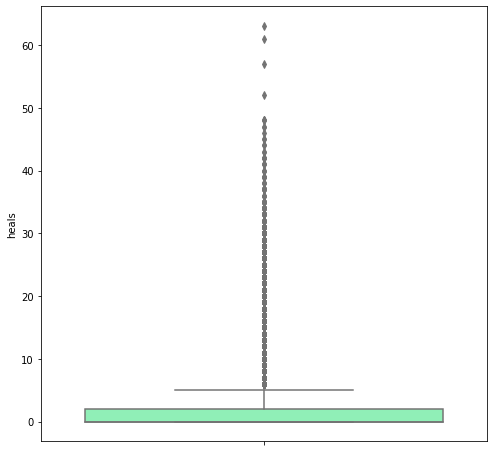

In [91]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['heals'],palette='rainbow')

In [92]:
len(iqr(df['heals']))

Lower limit:  -3.0
Upper limit:  5.0


73286

In [93]:
#Dealing with outlirs

df['heals']=df[(df['heals']>-3) & (df['heals']<5)]

<AxesSubplot:ylabel='heals'>

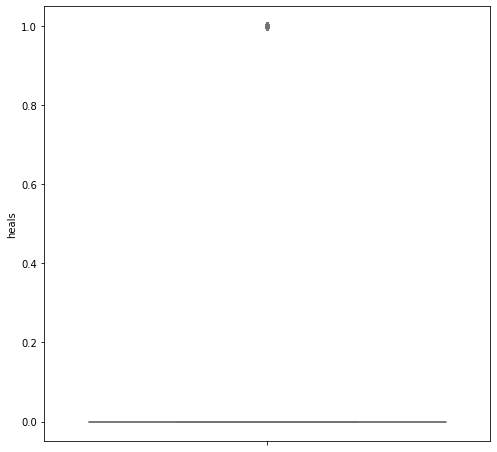

In [94]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['heals'],palette='rainbow')

Now, we can see we have eliminated approx. all the outliers

In [95]:
df['heals'].unique()

array([0.0, 1.0, nan], dtype=object)

In [96]:
df['heals'].fillna(df['heals'].median(),inplace=True)

<AxesSubplot:xlabel='heals', ylabel='count'>

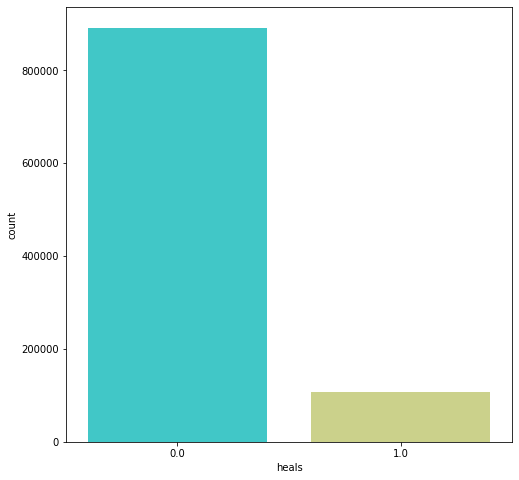

In [97]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['heals'],palette='rainbow')

After cleaning the data we can see that most of the people have used 0 and 1 heal

<Figure size 576x576 with 0 Axes>

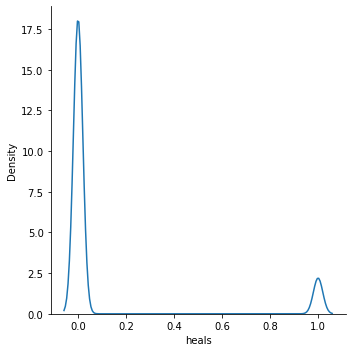

In [99]:
#plotting the displot after cleaning

plt.figure(figsize=(8,8))
sns.displot(x=df['heals'],kind='kde',palette='rainbow')

### Analysing killPlace
Ranking in match of number of enemy players killed.

In [100]:
df['killPlace'].describe()

count    1000000.000000
mean          47.603807
std           27.474075
min            1.000000
25%           24.000000
50%           47.000000
75%           71.000000
max          100.000000
Name: killPlace, dtype: float64

In [101]:
df['killPlace'].unique()

array([ 60,  57,  47,  75,  45,  44,  96,  48,  64,  74,  37,   5,  25,
        72,  13,  79,  18,  15,   2,   3,  11,  78,   7,   6,  87,  62,
        80,  61,  34,  24,  82,  73,  31,  86,  46,  12,  27,  77,  19,
        10,  63,  67,  36,   4,  29,  16,   8,  41,  21,  38,  55,  49,
        91,  54,  40,  69,  92,  23,  71,  30,  20,  81,  56,  84,  66,
        52,  85,  94,  50,  83,  58,  68,  65,  28,  26,  51,  35,  90,
        89,  42,  59,  53,  33,   9,  88,  43,  70,  17,  76,   1,  95,
        99,  22,  39,  32,  93,  14,  97,  98, 100], dtype=int64)

In [102]:
df['killPlace'].value_counts()

7      10913
4      10880
2      10862
3      10861
6      10859
       ...  
96      4918
97      3644
98      2250
99       981
100      296
Name: killPlace, Length: 100, dtype: int64

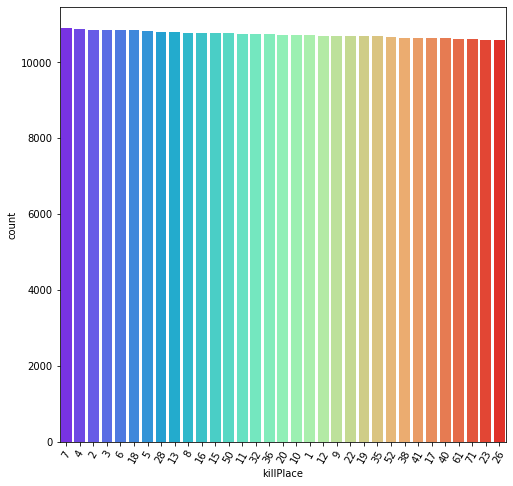

In [104]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['killPlace'],order=df['killPlace'].value_counts().iloc[:33].index,palette='rainbow')
plt.xticks(rotation=60)
plt.show()

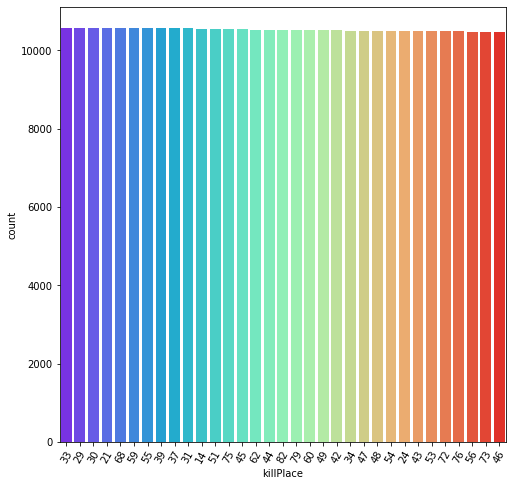

In [105]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['killPlace'],order=df['killPlace'].value_counts().iloc[33:66].index,palette='rainbow')
plt.xticks(rotation=60)
plt.show()

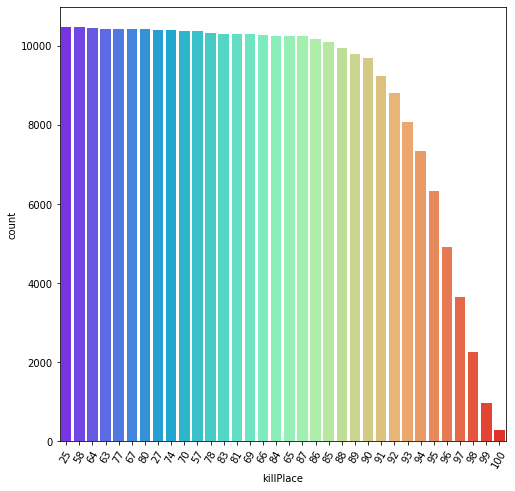

In [106]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['killPlace'],order=df['killPlace'].value_counts().iloc[66:].index,palette='rainbow')
plt.xticks(rotation=60)
plt.show()

- Rank 1 is received by 11955 people.
- Rank 100 is received by 372 people

In [107]:
rank_1=df['killPlace'].value_counts()[1]
rank_100=df['killPlace'].value_counts()[100]
print(f"Rank 1 is received by {rank_1} people. ")
print(f"Rank 100 is received by {rank_100} people.")

Rank 1 is received by 10710 people. 
Rank 100 is received by 296 people.


<Figure size 576x576 with 0 Axes>

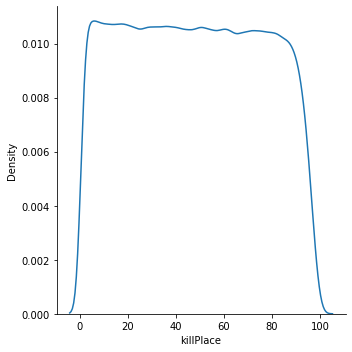

In [108]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['killPlace'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='killPlace'>

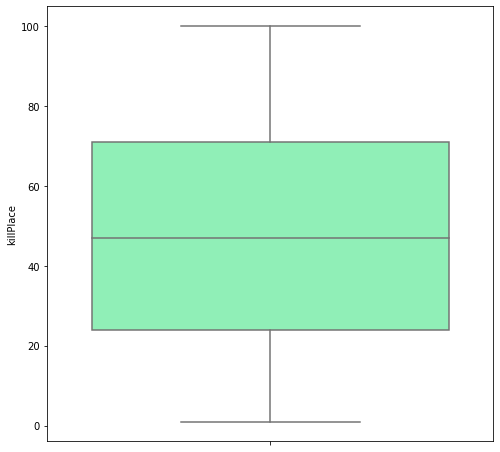

In [109]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['killPlace'],palette='rainbow')

There are no outliers in the killPlace.

### Analysing the killPoints
- Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

In [110]:
df['killPoints'].describe()

count    1000000.000000
mean         506.262853
std          627.770074
min            0.000000
25%            0.000000
50%            0.000000
75%         1172.000000
max         2152.000000
Name: killPoints, dtype: float64

In [111]:
df['killPoints'].unique().shape

(1454,)

In [112]:
df['killPoints'].head()

0    1241
1       0
2       0
3       0
4       0
Name: killPoints, dtype: int64

In [113]:
df['killPoints'].isnull().sum()

0

<Figure size 576x576 with 0 Axes>

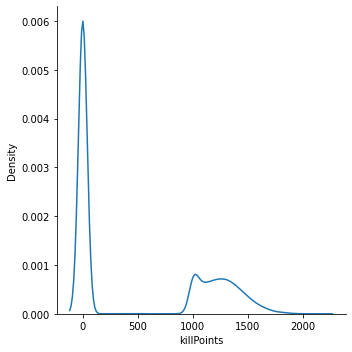

In [114]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['killPoints'],kind='kde',palette='rainbow')

- Most of the poepe have killpoint between 0 and 200
- Some of the people have killpoint between 900 and 1700
- % of people who scored 0 kill points are: 59.76485551503856%
- Maximum kill points scored is 2170 by 1 person

In [115]:
kill_0=df['killPoints'].value_counts()[0]/df['killPoints'].shape[0]*100
print(f"% of people who scored 0 kill points are: {kill_0}%")
print(f"Maximum kill points scored is {df['killPoints'].max()} by {df['killPoints'].value_counts()[df['killPoints'].max()]} person")


% of people who scored 0 kill points are: 59.614900000000006%
Maximum kill points scored is 2152 by 1 person


<AxesSubplot:ylabel='killPoints'>

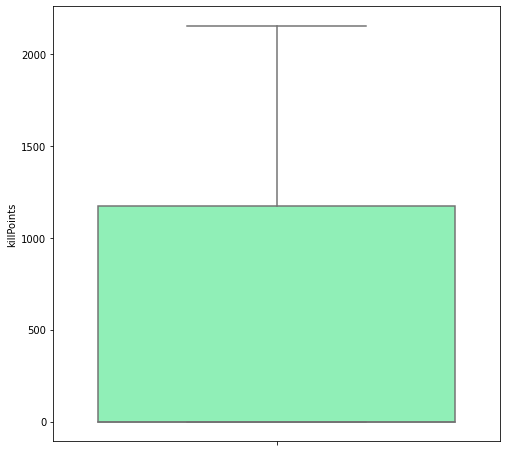

In [116]:
#plotting the barplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['killPoints'],palette='rainbow')

There are no outlier in the killpoints

### Analysing kills
Number of enemy players killed.

In [117]:
df['kills'].describe()

count    1000000.000000
mean           0.925650
std            1.560856
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           65.000000
Name: kills, dtype: float64

In [118]:
df['kills'].unique()

array([ 0,  1,  4,  2,  9,  3,  5,  6,  8,  7, 14, 13, 15, 12, 21, 11, 10,
       17, 20, 24, 18, 16, 22, 19, 23, 35, 31, 27, 25, 48, 42, 30, 26, 65,
       39, 33, 28, 29, 34, 57, 55, 56, 36, 38, 37, 44], dtype=int64)

In [119]:
df['kills'].value_counts()

0     568819
1     208851
2     105859
3      52253
4      28172
5      15118
6       8467
7       4922
8       2831
9       1751
10      1065
11       644
12       386
13       263
14       175
15       115
16        77
17        44
18        37
20        24
19        21
22        21
21        15
23        11
24        11
25         7
26         6
30         5
33         4
27         3
35         3
42         2
34         2
31         2
29         2
28         2
57         1
36         1
37         1
38         1
39         1
44         1
48         1
55         1
56         1
65         1
Name: kills, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='count'>

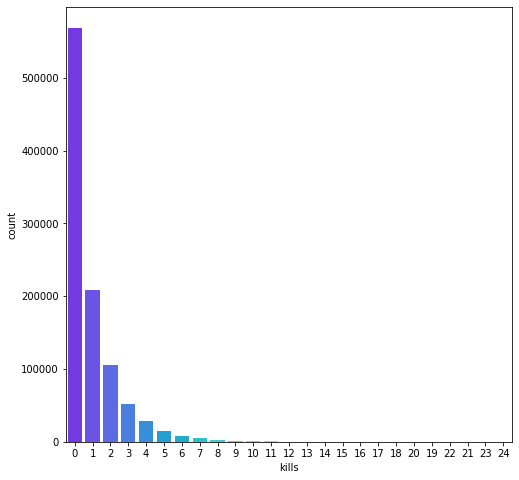

In [120]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['kills'],order=df['kills'].value_counts().iloc[:25].index,palette='rainbow')

<AxesSubplot:xlabel='kills', ylabel='count'>

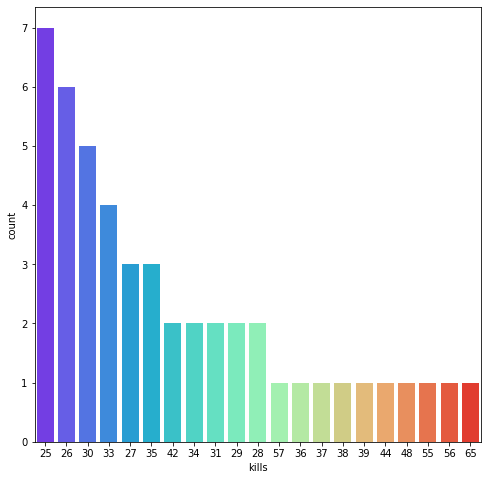

In [121]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['kills'],order=df['kills'].value_counts().iloc[25:].index,palette='rainbow')

- Maximum people got 0 kill
- Maximum kill by a person is 72
- % of people who got 0 kills are 56.861124253648775%
- % of people who got 1 kill are 20.882183096437842%

In [122]:
kills_0=df['kills'].value_counts()[0]/df['kills'].shape[0]*100
kills_1=df['kills'].value_counts()[1]/df['kills'].shape[0]*100
print(f"% of people who got 0 kills are {kills_0}%")
print(f"% of people who got 1 kill are {kills_1}%")

% of people who got 0 kills are 56.881899999999995%
% of people who got 1 kill are 20.8851%


<Figure size 576x576 with 0 Axes>

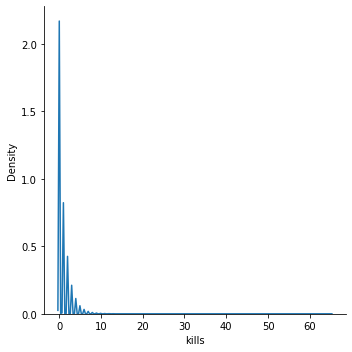

In [123]:
#plotting the dispot

plt.figure(figsize=(8,8))
sns.displot(x=df['kills'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='kills'>

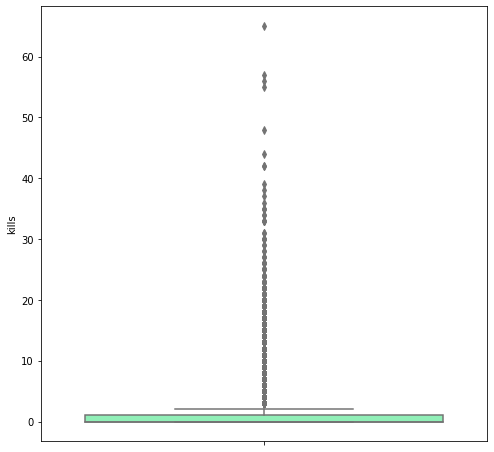

In [124]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['kills'],palette='rainbow')

- value above 2.5 and below -1.5 are outliers
- there are 129163 outliers which consists

In [125]:
outliers=(iqr(df['kills']))

Lower limit:  -1.5
Upper limit:  2.5


In [126]:
print(f"% of outliers in the kills are {129163/df['kills'].shape[0]*100}%")

% of outliers in the kills are 12.9163%


In [128]:
df['kills']=df[(df['kills']<2.5) & (df['kills']>-1.5)]

In [129]:
df['kills'].isnull().sum()

116471

In [130]:
df['kills'].fillna(df['kills'].median(),inplace=True)

In [131]:
df['kills'].isnull().sum()

0

<AxesSubplot:ylabel='kills'>

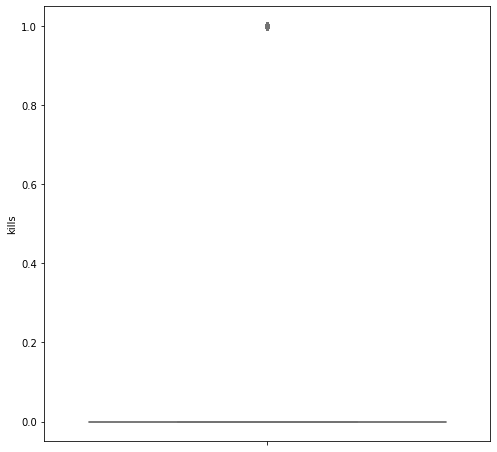

In [132]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['kills'],palette='rainbow')

After cleaning the data there are no outliers

<Figure size 576x576 with 0 Axes>

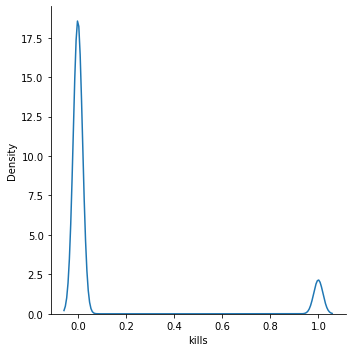

In [133]:
#plotting the dispot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=df['kills'],kind='kde',palette='rainbow')

### Analysinng killStreaks
Max number of enemy players killed in a short amount of time.

In [134]:
df['killStreaks'].describe()

count    1000000.000000
mean           0.544400
std            0.711526
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           14.000000
Name: killStreaks, dtype: float64

In [135]:
df['killStreaks'].unique()

array([ 0,  1,  2,  4,  3,  5,  6,  7, 10, 14,  8,  9, 11, 12],
      dtype=int64)

In [136]:
df['killStreaks'].value_counts()

0     568819
1     331627
2      87606
3      10500
4       1291
5         99
6         37
7         10
8          3
11         2
10         2
9          2
14         1
12         1
Name: killStreaks, dtype: int64

<AxesSubplot:xlabel='killStreaks', ylabel='count'>

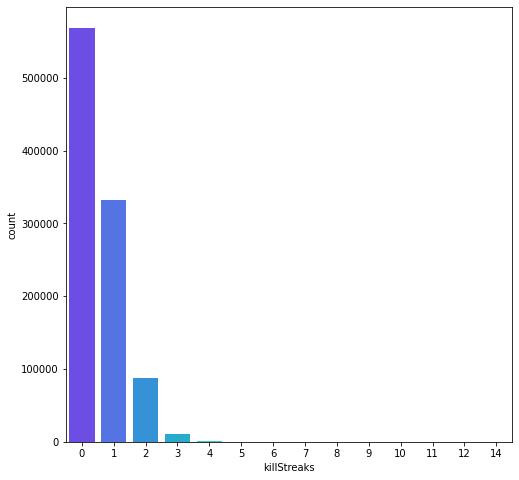

In [137]:
# Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['killStreaks'],palette='rainbow')

- Maximum poeple have 0 killStreak.
- Maximum kilStreak by any person is 20.
- % of people with 0 killStreak are 56.861124253648775%
- % of people with 1 killStreak are 33.18224911895026%

In [138]:
killS_0=df['killStreaks'].value_counts()[0]/df['killStreaks'].shape[0]*100
killS_1=df['killStreaks'].value_counts()[1]/df['killStreaks'].shape[0]*100
print(f"% of people with 0 killStreak are {killS_0}%")
print(f"% of people with 1 killStreak are {killS_1}%")

% of people with 0 killStreak are 56.881899999999995%
% of people with 1 killStreak are 33.1627%


<Figure size 576x576 with 0 Axes>

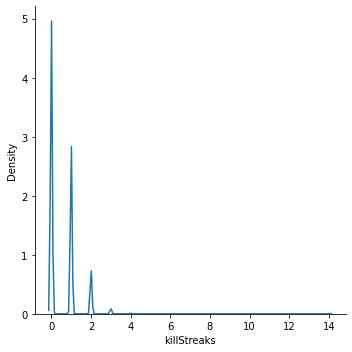

In [139]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['killStreaks'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='killStreaks'>

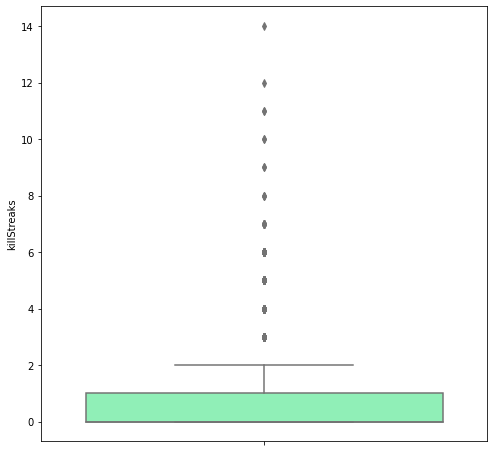

In [140]:
# plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['killStreaks'],palette='rainbow')

In [141]:
streak_outliers=iqr(df['killStreaks'])

Lower limit:  -1.5
Upper limit:  2.5


In [142]:
df['killStreaks']=df[(df['killStreaks']>-1.5) & (df['killStreaks']<2.5)]

In [143]:
df['killStreaks'].isnull().sum()

11948

In [144]:
df['killStreaks'].fillna(df['killStreaks'].median(),inplace=True)

In [145]:
df['killStreaks'].isnull().sum()

0

<AxesSubplot:ylabel='killStreaks'>

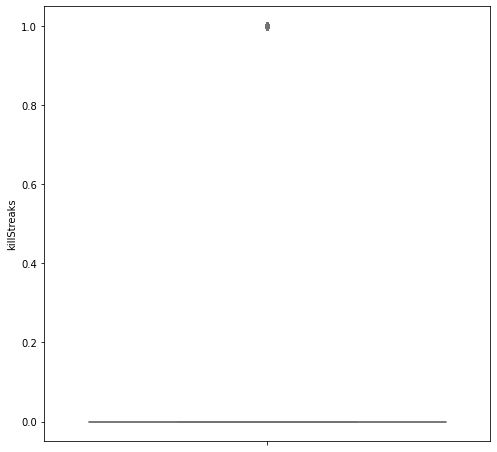

In [146]:
# plotting the boxplot after cleaning

plt.figure(figsize=(8,8))
sns.boxplot(y=df['killStreaks'],palette='rainbow')

There are no outliers after cleaning the data

<Figure size 576x576 with 0 Axes>

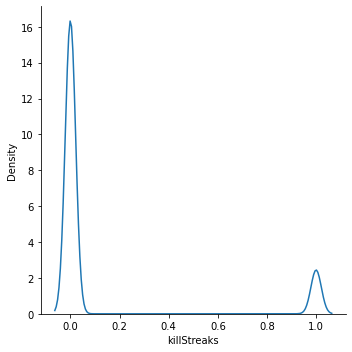

In [147]:
#plotting the displot after cleaing the data

plt.figure(figsize=(8,8))
sns.displot(x=df['killStreaks'],kind='kde',palette='rainbow')

### Analysing the longest kill
- Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

In [148]:
df['longestKill'].describe()

count    1000000.000000
mean          22.995083
std           50.902760
min            0.000000
25%            0.000000
50%            0.000000
75%           21.340000
max         1094.000000
Name: longestKill, dtype: float64

In [149]:
df['longestKill'].unique().shape

(24083,)

<Figure size 576x576 with 0 Axes>

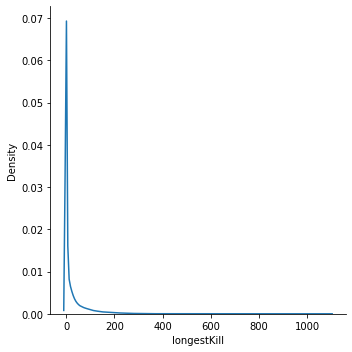

In [150]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['longestKill'],palette='rainbow',kind='kde')

- Most of the people have longestKill between 0 and 180
- % of people that are killed at zero point distance are 57.06422893081309%
- Maximum distance between a kill is 1040.0
- Maximum distance between a kill is 1040.0 and is done by 1 people

In [151]:
longest_0=df['longestKill'].value_counts()[0]/df['longestKill'].shape[0]*100
print(f"% of people that are kill at zero point distance are {longest_0}%")
print(f"Maximum distance between a kill is {df['longestKill'].max()} and is done by {df['longestKill'].value_counts()[df['longestKill'].max()]} people")


% of people that are kill at zero point distance are 57.0804%
Maximum distance between a kill is 1094.0 and is done by 1 people


<AxesSubplot:ylabel='longestKill'>

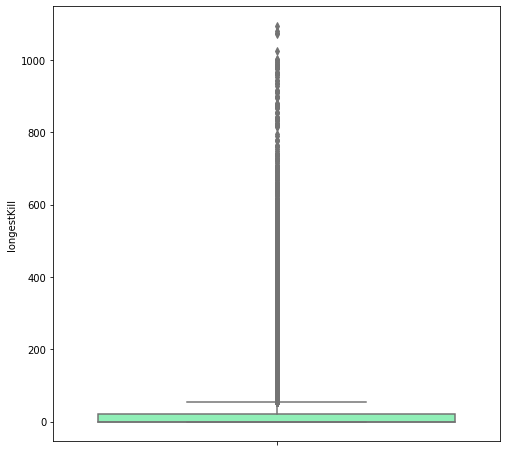

In [152]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['longestKill'],palette='rainbow')

- Values above 53.324999999999996 and below -31.994999999999997 are outliers

In [153]:
longest_outlier=iqr(df['longestKill'])

Lower limit:  -32.01
Upper limit:  53.349999999999994


In [154]:
#Removing outliers

df['longestKill']=df[(df['longestKill']>-31.994999999999997) & (df['longestKill']< 53.324999999999996)]

In [155]:
df['longestKill'].isnull().sum()

138176

In [156]:
df['longestKill'].fillna(df['longestKill'].mean(),inplace=True)

In [157]:
df['longestKill'].isnull().sum()

0

<AxesSubplot:ylabel='longestKill'>

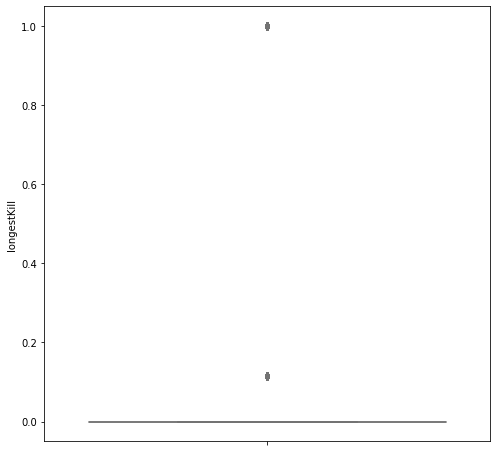

In [158]:
#plotting the boxplot after cleaning the data

plt.figure(figsize=(8,8))
sns.boxplot(y=df['longestKill'],palette='rainbow')

Now we can see that there are no outliers

<Figure size 576x576 with 0 Axes>

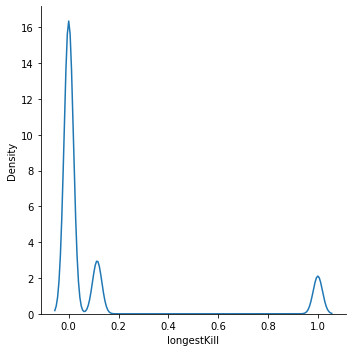

In [159]:
#plotting the displot after the outliers

plt.figure(figsize=(8,8))
sns.displot(x=df['longestKill'],palette='rainbow',kind='kde')

### Analysing matchDuration
Duration of match in seconds

In [160]:
df['matchDuration'].describe()

count    1000000.000000
mean        1579.551800
std          258.620313
min          152.000000
25%         1367.000000
50%         1438.000000
75%         1851.000000
max         2237.000000
Name: matchDuration, dtype: float64

In [161]:
df['matchDuration'].unique().shape

(1261,)

<Figure size 576x576 with 0 Axes>

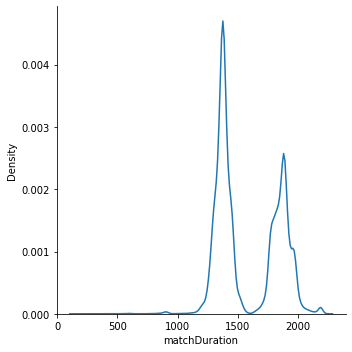

In [162]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=df['matchDuration'],kind='kde',palette='rainbow')

- Maximum match are palyed between the duration of 1200-1600 and 1700-2200
- Minumum duration of a match is 9
- Number of matches palyed with minimum duration is 1
- Minumum duration of a match is 2237
- Number of matches palyed with minimum duration is 21
- Average duration of a match is 1579.347832500706

In [163]:
print(f"Minumum duration of a match is {df['matchDuration'].min()}")
print(f"Number of matches palyed with minimum duration is {df['matchDuration'].value_counts()[df['matchDuration'].min()]}")
print(f"Minumum duration of a match is {df['matchDuration'].max()}")
print(f"Number of matches palyed with minimum duration is {df['matchDuration'].value_counts()[df['matchDuration'].max()]}")
print(f"Average duration of a match is {df['matchDuration'].mean()}")

Minumum duration of a match is 152
Number of matches palyed with minimum duration is 3
Minumum duration of a match is 2237
Number of matches palyed with minimum duration is 25
Average duration of a match is 1579.5518


<AxesSubplot:ylabel='matchDuration'>

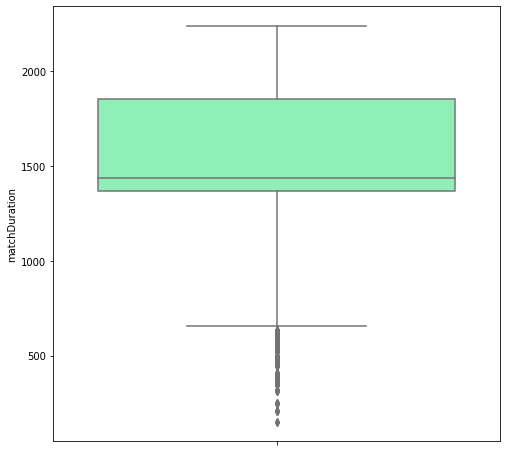

In [164]:
#Plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=df['matchDuration'],palette='rainbow')

Values below 641.0 and above 2577.0 are outliers

In [165]:
duration_outlier=iqr(df['matchDuration'])

Lower limit:  641.0
Upper limit:  2577.0


In [166]:
#Removing outliers

df['matchDuration']=df[(df['matchDuration']>641.0) & (df['matchDuration']<2577.0)]

In [167]:
df['matchDuration'].isnull().sum()

582

In [168]:
df['matchDuration'].fillna(df['matchDuration'].mean(),inplace=True)

<AxesSubplot:ylabel='matchDuration'>

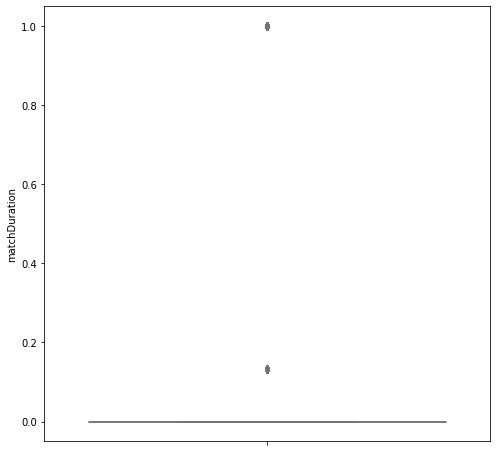

In [169]:
#Plotting the boxplot after cleaning the data

plt.figure(figsize=(8,8))
sns.boxplot(y=df['matchDuration'],palette='rainbow')

There are no outliers after cleaning the data

<Figure size 576x576 with 0 Axes>

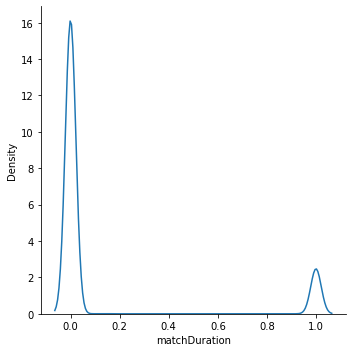

In [170]:
#Plotting the displot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=df['matchDuration'],kind='kde',palette='rainbow')

### Analysing matchType
String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

In [171]:
df['matchType'].describe()

count       1000000
unique           16
top       squad-fpp
freq         395314
Name: matchType, dtype: object

In [172]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [173]:
df['matchType'].value_counts()

squad-fpp           395314
duo-fpp             223647
squad               141479
solo-fpp            120270
duo                  70175
solo                 41245
normal-squad-fpp      3827
crashfpp              1366
normal-duo-fpp        1246
flaretpp               543
normal-solo-fpp        394
flarefpp               162
normal-squad           133
crashtpp                86
normal-solo             74
normal-duo              39
Name: matchType, dtype: int64

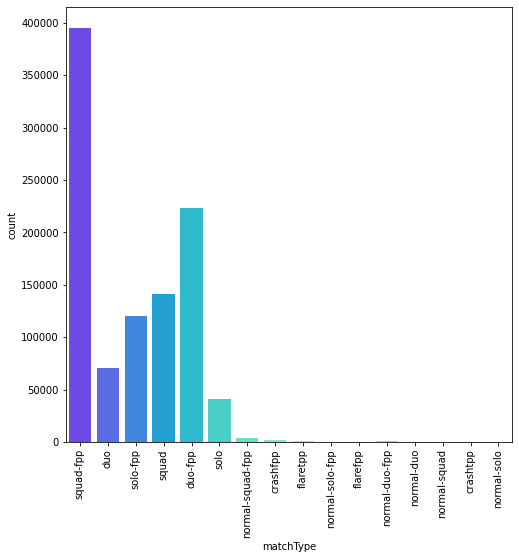

In [174]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['matchType'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

- Mostly people play squad-fpp, solo-fpp,duo-fpp and squad
- % of people that play squad-fpp are 39.46788013765784 %
- % of people that play duo-fpp are 22.48066547814151 %
- % of people that play squad are 14.083573347053543 %
- % of people that play solo-fpp are 12.040023674557586 %

In [175]:
squad_fpp=df['matchType'].value_counts()['squad-fpp']/df['matchType'].shape[0]*100
solo_fpp=df['matchType'].value_counts()['solo-fpp']/df['matchType'].shape[0]*100
duo_fpp=df['matchType'].value_counts()['duo-fpp']/df['matchType'].shape[0]*100
squad=df['matchType'].value_counts()['squad']/df['matchType'].shape[0]*100
print(f"% of people that play squad-fpp are {squad_fpp} %")
print(f"% of people that play solo-fpp are {solo_fpp} %")
print(f"% of people that play duo-fpp are {duo_fpp} %")
print(f"% of people that play squad are {squad} %")

% of people that play squad-fpp are 39.5314 %
% of people that play solo-fpp are 12.027000000000001 %
% of people that play duo-fpp are 22.364700000000003 %
% of people that play squad are 14.1479 %


### Analysing numGroups
- Number of groups we have data for in the match.

In [176]:
df['numGroups'].describe()

count    1000000.000000
mean          42.989947
std           23.285932
min            1.000000
25%           27.000000
50%           30.000000
75%           47.000000
max          100.000000
Name: numGroups, dtype: float64

In [177]:
df['numGroups'].unique().shape

(100,)

In [178]:
df['numGroups'].value_counts()

27    121023
28    109824
26     93892
29     71448
47     60832
       ...  
66        26
54        23
62        18
57        18
55        12
Name: numGroups, Length: 100, dtype: int64

<AxesSubplot:xlabel='numGroups', ylabel='count'>

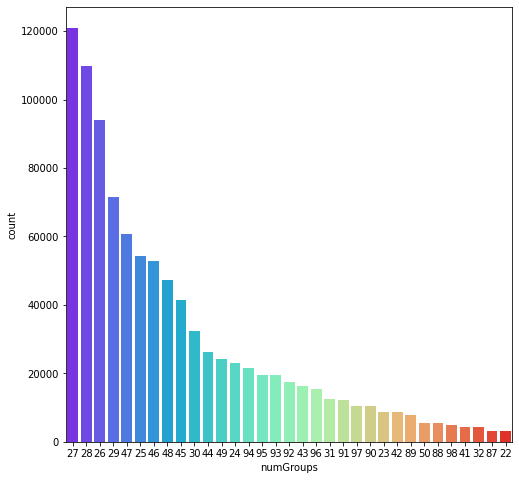

In [180]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['numGroups'],palette='rainbow',order=df['numGroups'].value_counts().iloc[:33].index)

<AxesSubplot:xlabel='numGroups', ylabel='count'>

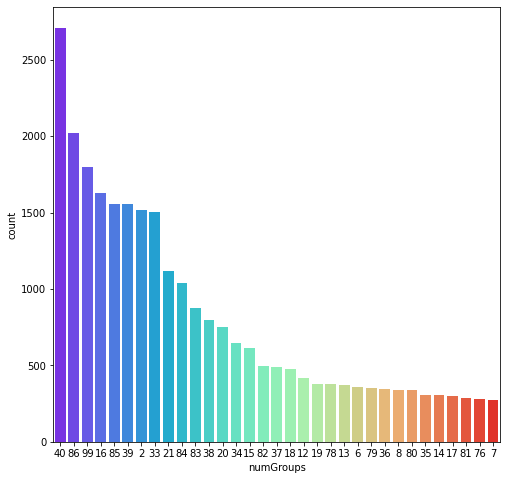

In [181]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['numGroups'],palette='rainbow',order=df['numGroups'].value_counts().iloc[33:66].index)

<AxesSubplot:xlabel='numGroups', ylabel='count'>

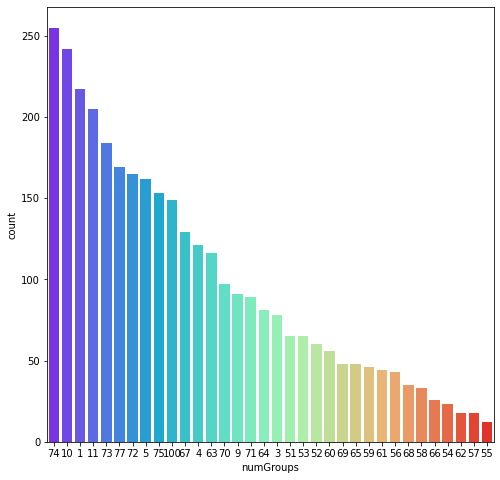

In [182]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['numGroups'],palette='rainbow',order=df['numGroups'].value_counts().iloc[66:].index)

- Maximum group formed in a match are 27 followed by 28 and 26
- % of 27, 28 and 26 group formed in a match are 32.41525461842765%

In [183]:
group_27=df['numGroups'].value_counts()[27]/df['numGroups'].shape[0]*100
group_28=df['numGroups'].value_counts()[28]/df['numGroups'].shape[0]*100
group_26=df['numGroups'].value_counts()[26]/df['numGroups'].shape[0]*100
print(f" % of 27, 28 and 26 group formed in a match are {group_27+group_26+group_28}%")

 % of 27, 28 and 26 group formed in a match are 32.4739%


<Figure size 576x576 with 0 Axes>

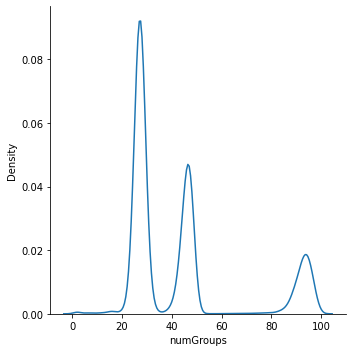

In [184]:
plt.figure(figsize=(8,8))
sns.displot(x=df['numGroups'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='numGroups'>

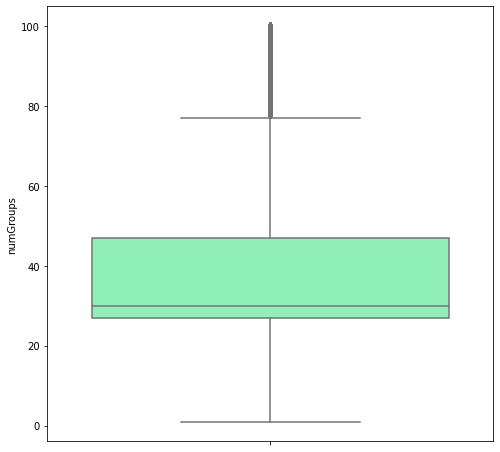

In [185]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['numGroups'],palette='rainbow')

- Above 77 all the value are outliers.

In [186]:
group=iqr(df['numGroups'])

Lower limit:  -3.0
Upper limit:  77.0


In [187]:
df['numGroups']=df[(df['numGroups']>-3) &(df['numGroups']<77)]

In [188]:
df['numGroups'].fillna(df['numGroups'].median(),inplace=True)

In [189]:
df['numGroups'].isnull().sum()

0

<AxesSubplot:ylabel='numGroups'>

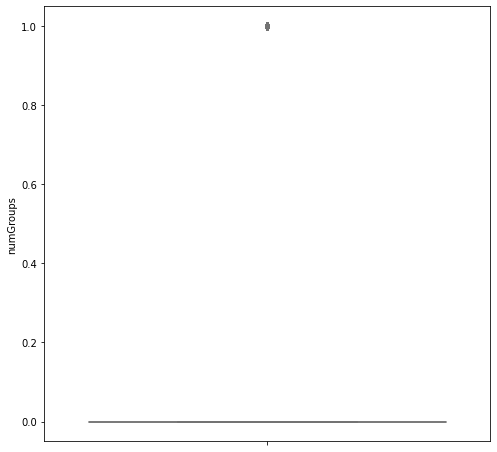

In [190]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['numGroups'],palette='rainbow')

Now, there are no outliers after cleaning the data.

<Figure size 576x576 with 0 Axes>

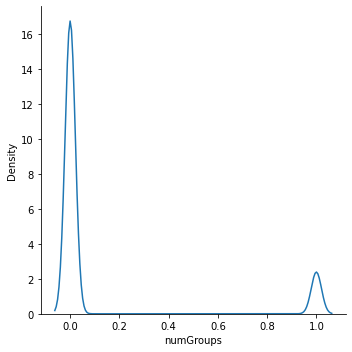

In [191]:
plt.figure(figsize=(8,8))
sns.displot(x=df['numGroups'],palette='rainbow',kind='kde')

Displot after cleaning the data

### Analysing rankPoints
- Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”

In [192]:
df['rankPoints'].describe()

count    1000000.000000
mean         890.447563
std          736.964551
min           -1.000000
25%           -1.000000
50%         1443.000000
75%         1500.000000
max         5665.000000
Name: rankPoints, dtype: float64

In [193]:
df['rankPoints'].unique().shape

(1675,)

<Figure size 576x576 with 0 Axes>

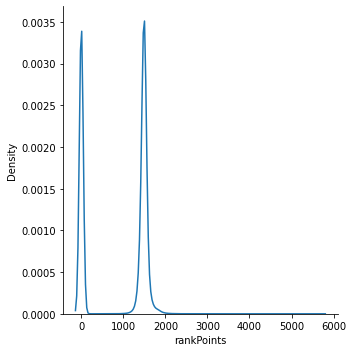

In [194]:
plt.figure(figsize=(8,8))
sns.displot(x=df['rankPoints'],palette='rainbow',kind='kde')

- Most of the player have rank point bwtween 0-100 and 1000-2000
- % of player having -1 or None rank points are 38.23063264678316%
- Maximum rank point is 5910 and is obtained by 1 person

In [195]:
rank_none=df['rankPoints'].value_counts()[-1]/df['rankPoints'].shape[0]*100
print(f"% of player having -1 or None rank points are {rank_none}%")
print(f"Maximum rank point is {df['rankPoints'].max()} and is obtained by {df['rankPoints'].value_counts()[df['rankPoints'].max()]} person")

% of player having -1 or None rank points are 38.3602%
Maximum rank point is 5665 and is obtained by 1 person


<AxesSubplot:ylabel='rankPoints'>

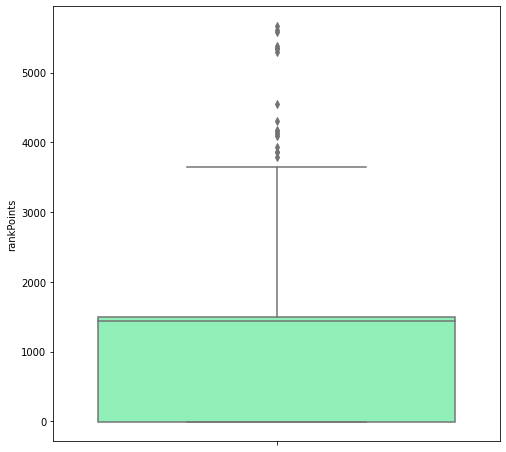

In [196]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['rankPoints'],palette='rainbow')

There are outliers above 3751.5

In [197]:
rankp_outliers=iqr(df['rankPoints'])

Lower limit:  -2252.5
Upper limit:  3751.5


In [198]:
df['rankPoints']=df[(df['rankPoints']>-2252.5) & (df['rankPoints']<3751.5)]

In [199]:
df['rankPoints'].fillna(df['rankPoints'].median(),inplace=True)

<AxesSubplot:ylabel='rankPoints'>

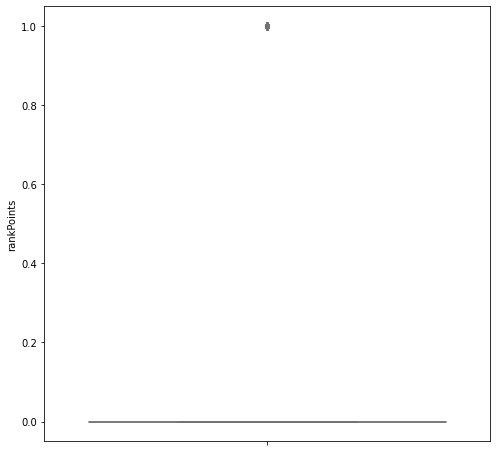

In [200]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['rankPoints'],palette='rainbow')

After cleaning, we can see that there are no outliers.

<Figure size 576x576 with 0 Axes>

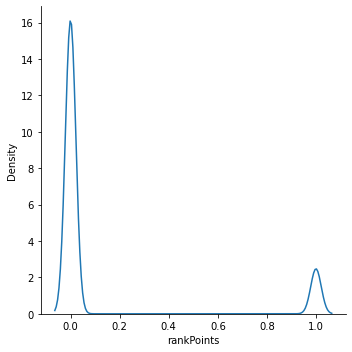

In [201]:
# Displot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=df['rankPoints'],palette='rainbow',kind='kde')

Analysing revives
Number of times this player revived teammates.

In [202]:
df['revives'].describe()

count    1000000.000000
mean           0.164289
std            0.469883
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           19.000000
Name: revives, dtype: float64

In [203]:
df['revives'].unique()

array([ 0,  1,  3,  2,  4,  5,  6,  8,  9,  7, 13, 16, 11, 12, 10, 17, 14,
       19, 15, 18], dtype=int64)

In [204]:
df['revives'].value_counts()

0     868206
1     105466
2      21576
3       3866
4        657
5        147
6         30
7         13
8         10
9          5
11         5
10         4
13         4
14         3
12         2
16         2
18         1
15         1
17         1
19         1
Name: revives, dtype: int64

<AxesSubplot:xlabel='revives', ylabel='count'>

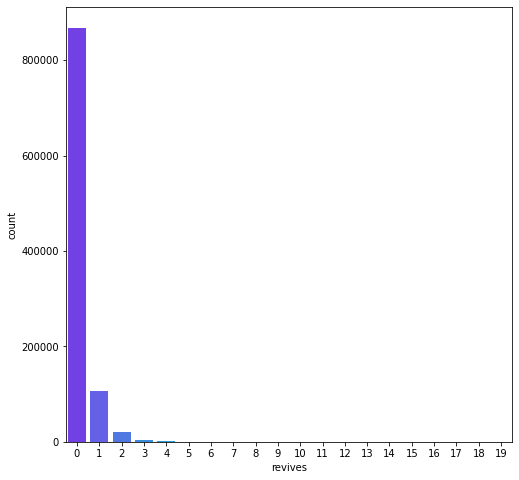

In [205]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=df['revives'],palette='rainbow')

- From graph we can see that maximum time no reive is given to the team mates.
- % of time no revive is given is 86.83642427829479%
- % of time 1 revive given is 10.538955980794105%
- Maximum revives given by any player to his temmates are 23

In [206]:
revive_0=df['revives'].value_counts()[0]/df['revives'].shape[0]*100
revive_1=df['revives'].value_counts()[1]/df['revives'].shape[0]*100
print(f"% of time no revive is given is {revive_0}%")
print(f"% of time 1 revive given is {revive_1}%")

% of time no revive is given is 86.8206%
% of time 1 revive given is 10.5466%


<Figure size 576x576 with 0 Axes>

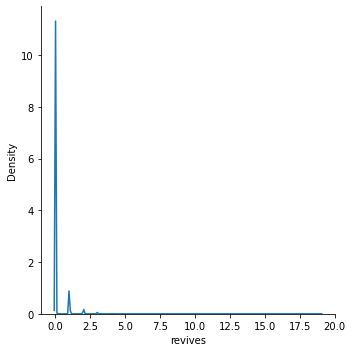

In [207]:
plt.figure(figsize=(8,8))
sns.displot(x=df['revives'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='revives'>

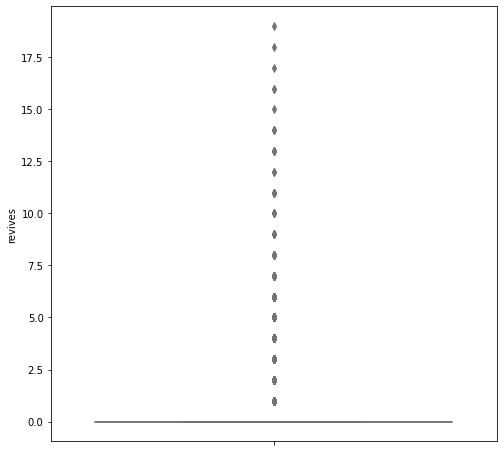

In [208]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['revives'],palette='rainbow')

In [209]:
revive_outliers=iqr(df['revives'])

Lower limit:  0.0
Upper limit:  0.0


In [210]:
df['revives']=df[df['revives']<1]

In [211]:
df['revives'].isnull().sum()

131794

In [212]:
df['revives'].fillna(df['revives'].median(),inplace=True)

<AxesSubplot:ylabel='revives'>

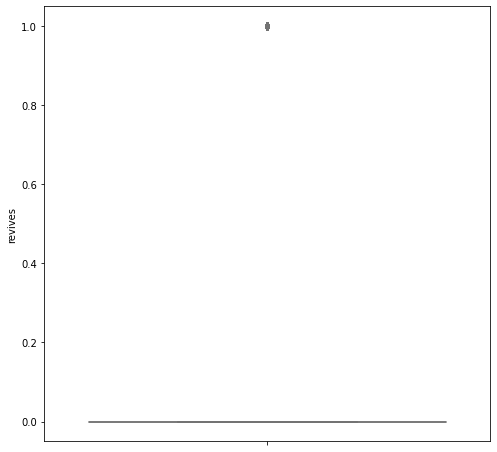

In [213]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['revives'],palette='rainbow')

Now, after cleaning the data there are no outliers in the data

<Figure size 576x576 with 0 Axes>

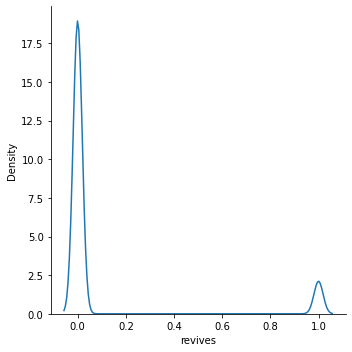

In [214]:
plt.figure(figsize=(8,8))
sns.displot(x=df['revives'],palette='rainbow',kind='kde')

### Analysing rideDistance
- Total distance traveled in vehicles measured in meters.

In [215]:
df['rideDistance'].describe()

count    1000000.000000
mean         607.383398
std         1498.710981
min            0.000000
25%            0.000000
50%            0.000000
75%            0.424525
max        33970.000000
Name: rideDistance, dtype: float64

In [216]:
df['rideDistance'].unique().shape

(23974,)

<Figure size 576x576 with 0 Axes>

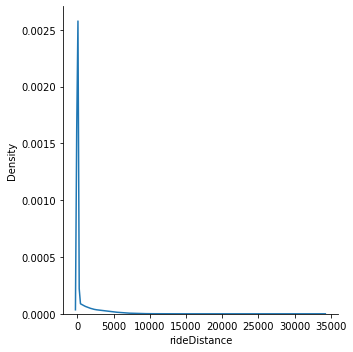

In [217]:
plt.figure(figsize=(8,8))
sns.displot(x=df['rideDistance'],palette='rainbow',kind='kde')

- The range of distance travelled by mximum palyer is 0-5300
- The mean distance travelled is 604.2142157227097
- The minimum distance traveled is 0.0
- The maximum distance traveled is 35400.0
- % of people who travelled 0 distance are 74.43930336355018%

In [219]:
print(f"The mean distance travelled is {df['rideDistance'].mean()}")
print(f"The minimum distance traveled is {df['rideDistance'].min()}")
print(f"The maximum distance traveled is {df['rideDistance'].max()}")
travelled_0=df['rideDistance'].value_counts()[0]/df['rideDistance'].shape[0]*100
print(f"% of people who travelled 0 distance are {travelled_0}%")

The mean distance travelled is 607.3833984963027
The minimum distance traveled is 0.0
The maximum distance traveled is 33970.0
% of people who travelled 0 distance are 74.3944%


<AxesSubplot:ylabel='rideDistance'>

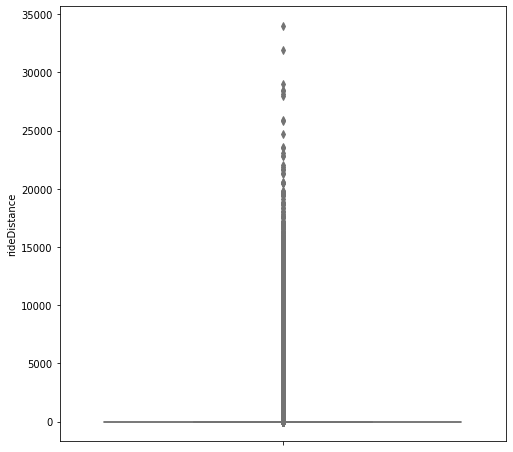

In [220]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['rideDistance'],palette='rainbow')

Values above 0.19818750000000002 and below -0.1189125 are outliers

In [221]:
rideD_outlier=iqr(df['rideDistance'])

Lower limit:  -0.6367874999999998
Upper limit:  1.0613124999999997


In [222]:
df['rideDistance']=df[(df['rideDistance']>-0.1189125) & (df['rideDistance']<0.19818750000000002)]

In [223]:
df['rideDistance'].isnull().sum()

250227

In [224]:
df['rideDistance'].fillna(df['rideDistance'].median(),inplace=True)

<AxesSubplot:ylabel='rideDistance'>

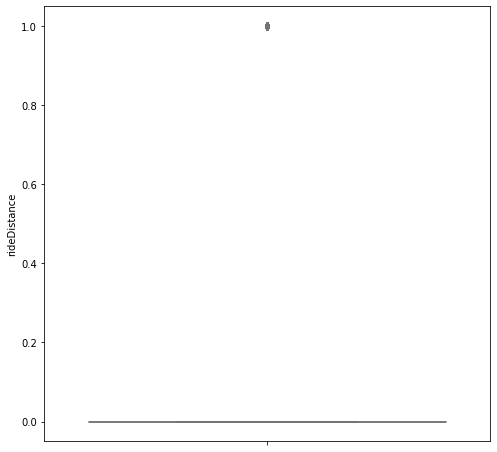

In [225]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['rideDistance'],palette='rainbow')

Now there are no outliers after cleaning the rideDistance data

<Figure size 576x576 with 0 Axes>

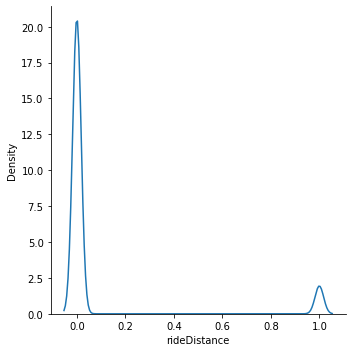

In [226]:
plt.figure(figsize=(8,8))
sns.displot(x=df['rideDistance'],palette='rainbow',kind='kde')

### Analysing roadKills
- Number of kills while in a vehicle.

In [227]:
df['roadKills'].describe()

count    1000000.000000
mean           0.003516
std            0.074092
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            9.000000
Name: roadKills, dtype: float64

In [228]:
df['roadKills'].unique()

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int64)

In [229]:
df['roadKills'].value_counts()

0    997096
1      2491
2       304
3        68
4        18
6         9
5         8
8         3
7         2
9         1
Name: roadKills, dtype: int64

<AxesSubplot:xlabel='roadKills', ylabel='count'>

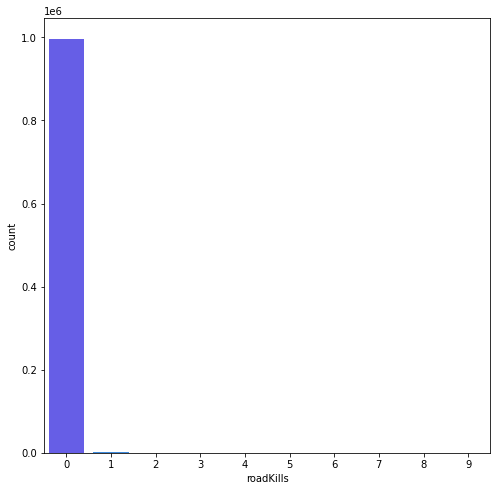

In [230]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['roadKills'],palette='rainbow')

- Maximum time there were zero roadKill
- % of 0 roadkills are 99.70397808124547%
- Maximum number of kill in a vehicle is 14 by 1 person

In [231]:
roadK_0=df['roadKills'].value_counts()[0]/df['roadKills'].shape[0]*100
print(f" % of 0 roadkills are {roadK_0}%")
print(f"Maximum kills of 14 is by {df['roadKills'].value_counts()[df['roadKills'].max()]} person")

 % of 0 roadkills are 99.7096%
Maximum kills of 14 is by 1 person


<Figure size 576x576 with 0 Axes>

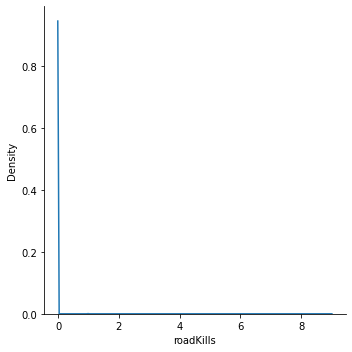

In [232]:
plt.figure(figsize=(8,8))
sns.displot(x=df['roadKills'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='roadKills'>

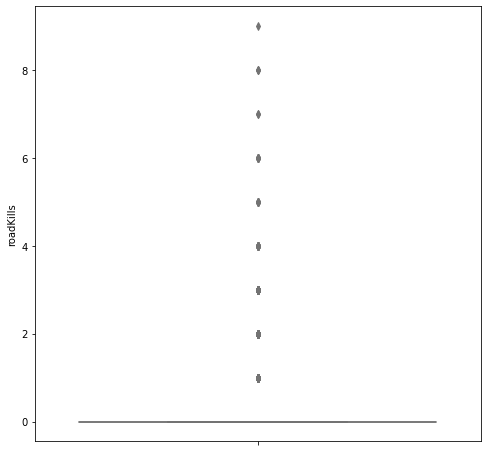

In [233]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['roadKills'],palette='rainbow')

In [234]:
road_kill_outlier=iqr(df['roadKills'])

Lower limit:  0.0
Upper limit:  0.0


In [235]:
df['roadKills']=df[(df['roadKills']<1)]

In [236]:
df['roadKills'].isnull().sum()

2904

In [237]:
df['roadKills'].fillna(df['roadKills'].median(),inplace=True)

<AxesSubplot:ylabel='roadKills'>

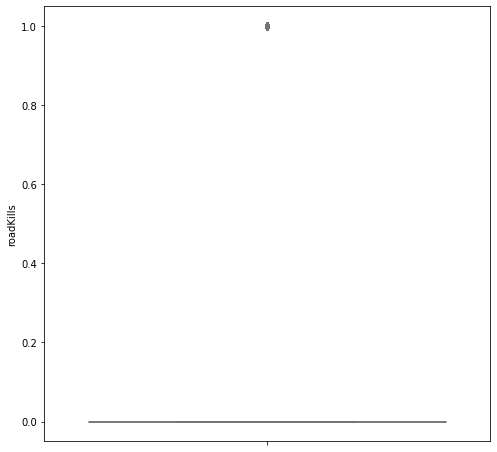

In [238]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['roadKills'],palette='rainbow')

Now there are no outliers after cleaning roadKill

<Figure size 576x576 with 0 Axes>

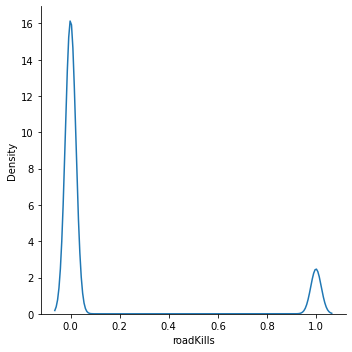

In [239]:
# Displots after cleaning roadKills

plt.figure(figsize=(8,8))
sns.displot(x=df['roadKills'],palette='rainbow',kind='kde')

### Analysing swimDistance
- Total distance traveled by swimming measured in meters.

In [240]:
df['swimDistance'].describe()

count    1000000.000000
mean           4.515281
std           30.397258
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         2295.000000
Name: swimDistance, dtype: float64

In [241]:
df['swimDistance'].unique().shape

(20065,)

<Figure size 576x576 with 0 Axes>

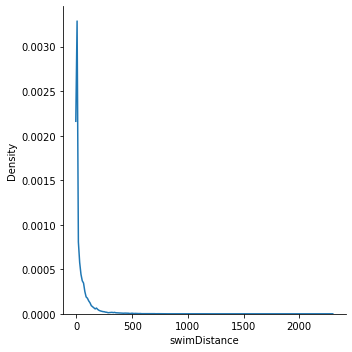

In [242]:
plt.figure(figsize=(8,8))
sns.displot(x=df['swimDistance'],palette='rainbow',kind='kde')

- From graph it is clear that most of the peope have travelled zero distace
- % of people who swimmed 0 distance are 93.46817876809548%
- Maximum distance travelled by person is 2668
- Mean distance is 4.5450684734407725

In [243]:
swim_0=df['swimDistance'].value_counts()[0]/df['swimDistance'].shape[0]*100
print(f" % of people who swimmed 0 distance are {swim_0}% ")
print(f"Mean swim distance is {df['swimDistance'].mean()}")

 % of people who swimmed 0 distance are 93.47529999999999% 
Mean swim distance is 4.51528074699995


<AxesSubplot:ylabel='swimDistance'>

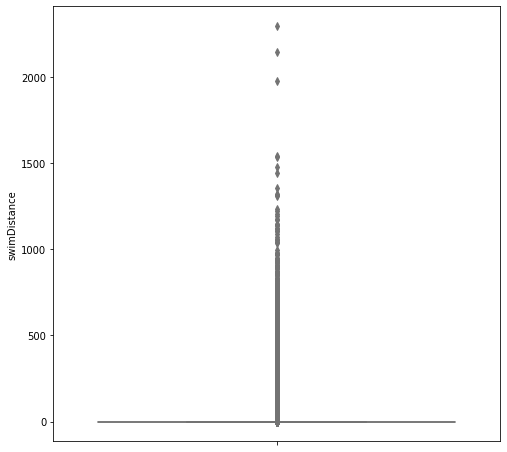

In [244]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['swimDistance'],palette='rainbow')

In [245]:
swim_outliers=iqr(df['swimDistance'])

Lower limit:  0.0
Upper limit:  0.0


In [246]:
df['swimDistance']=df[(df['swimDistance']<1)]

In [247]:
df['swimDistance'].isnull().sum()

63764

In [248]:
df['swimDistance'].fillna(df['swimDistance'].mean(),inplace=True)

<AxesSubplot:ylabel='swimDistance'>

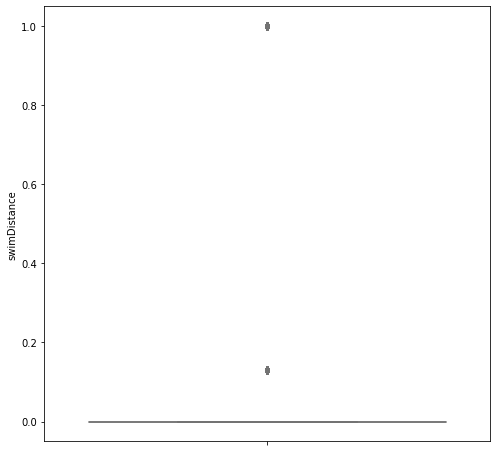

In [249]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['swimDistance'],palette='rainbow')

Now there are no outliers after cleaning hte swinDistance column

<Figure size 576x576 with 0 Axes>

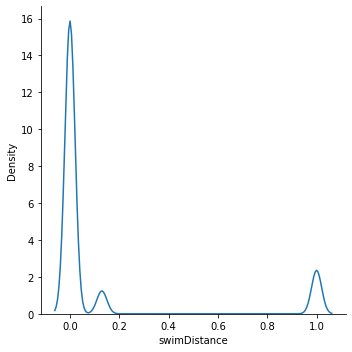

In [250]:
plt.figure(figsize=(8,8))
sns.displot(x=df['swimDistance'],palette='rainbow',kind='kde')

### Analysing teamKills
- Number of times this player killed a teammate

In [251]:
df['teamKills'].describe()

count    1000000.000000
mean           0.023964
std            0.168504
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           10.000000
Name: teamKills, dtype: float64

In [252]:
df['teamKills'].unique()

array([ 0,  1,  2,  3,  4,  5, 10,  7], dtype=int64)

In [253]:
df['teamKills'].value_counts()

0     978181
1      19941
2       1652
3        201
4         21
10         2
7          1
5          1
Name: teamKills, dtype: int64

<AxesSubplot:xlabel='teamKills', ylabel='count'>

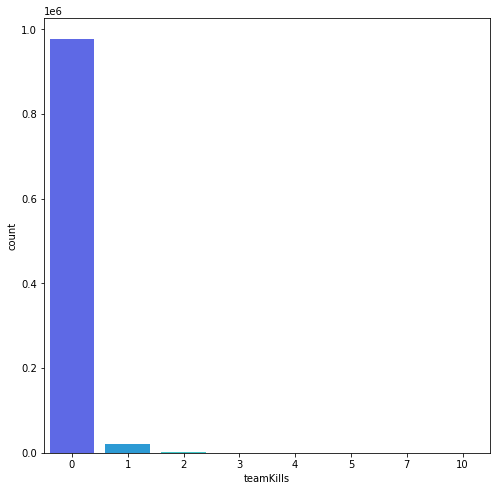

In [254]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['teamKills'],palette='rainbow')

- There are very rare chance that anyone killed his own teammate
- % of time when no teammate was killed is 97.8064155172693%
- Maximum numbe of times a teammate was killed is 10

In [255]:
teamate_0=df['teamKills'].value_counts()[0]/df['teamKills'].shape[0]*100
print(f" % of time when no teammate was killed is {teamate_0}%")

 % of time when no teammate was killed is 97.8181%


<Figure size 576x576 with 0 Axes>

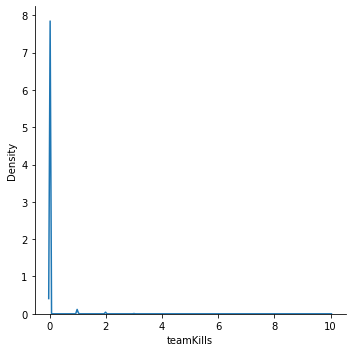

In [256]:
plt.figure(figsize=(8,8))
sns.displot(x=df['teamKills'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='teamKills'>

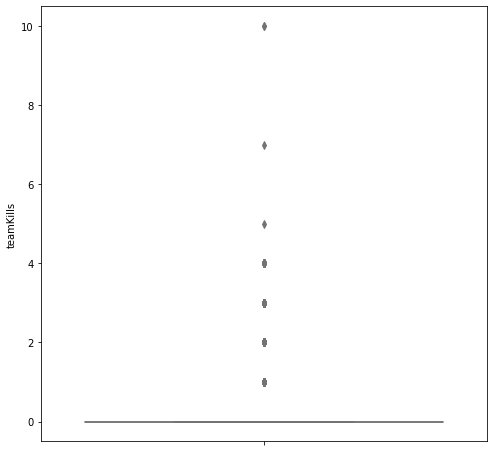

In [257]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['teamKills'],palette='rainbow')

In [258]:
temmate_outlier=iqr(df['teamKills'])

Lower limit:  0.0
Upper limit:  0.0


In [259]:
df['teamKills']=df[(df['teamKills']<1)]

In [261]:
df['teamKills'].isnull().sum()

21819

In [262]:
df['teamKills'].fillna(df['teamKills'].median(),inplace=True)

<AxesSubplot:ylabel='teamKills'>

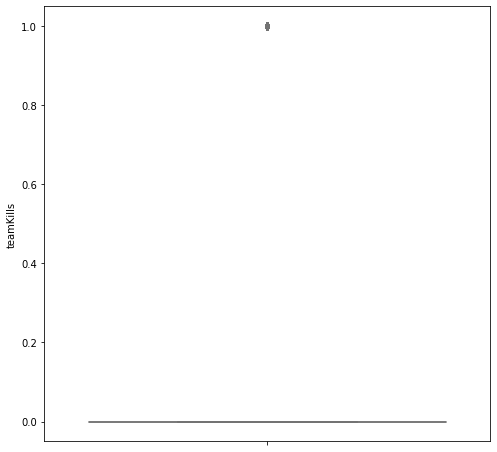

In [263]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['teamKills'],palette='rainbow')

Now there are no outliers after cleaning the teamKills column

<Figure size 576x576 with 0 Axes>

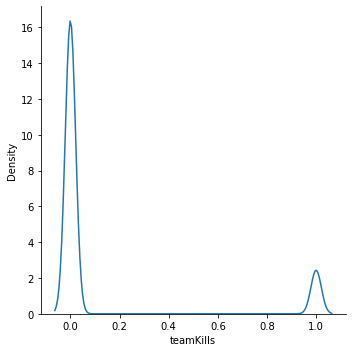

In [264]:
plt.figure(figsize=(8,8))
sns.displot(x=df['teamKills'],palette='rainbow',kind='kde')

### Analysing vehicleDestroys
- Number of vehicles destroyed.

In [265]:
df['vehicleDestroys'].describe()

count    1000000.000000
mean           0.007875
std            0.092179
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            4.000000
Name: vehicleDestroys, dtype: float64

In [266]:
df['vehicleDestroys'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [267]:
df['vehicleDestroys'].value_counts()

0    992438
1      7275
2       264
3        20
4         3
Name: vehicleDestroys, dtype: int64

<AxesSubplot:xlabel='vehicleDestroys', ylabel='count'>

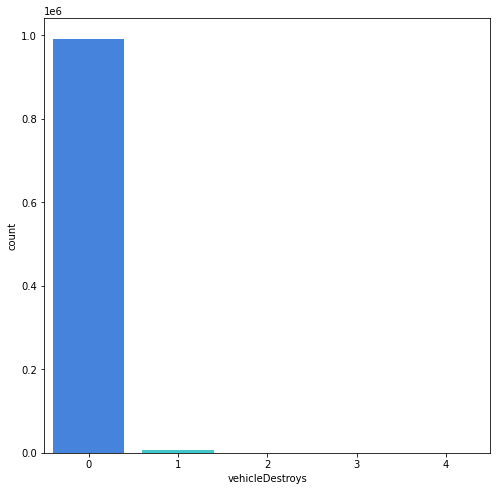

In [268]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['vehicleDestroys'],palette='rainbow')

- From graph it is clear that usually no vehicles were destroyed
- % of times no vehice were destroyed is 99.24748727672427%
- Only 1 time, maximum of 5 vehicle were destroyed

In [269]:
destroy_0=df['vehicleDestroys'].value_counts()[0]/df['vehicleDestroys'].shape[0]*100
print(f" % of times no vehice were destroyed is {destroy_0}%")

 % of times no vehice were destroyed is 99.24380000000001%


<Figure size 576x576 with 0 Axes>

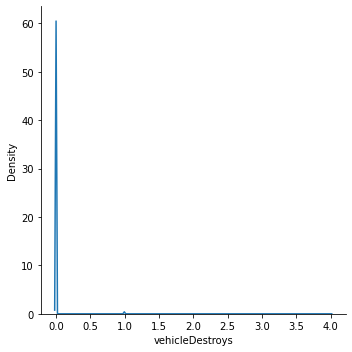

In [270]:
plt.figure(figsize=(8,8))
sns.displot(x=df['vehicleDestroys'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='vehicleDestroys'>

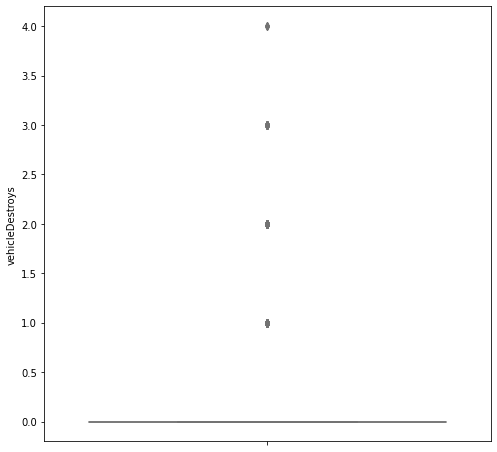

In [271]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['vehicleDestroys'],palette='rainbow')

In [272]:
vehicleD=iqr(df['vehicleDestroys'])

Lower limit:  0.0
Upper limit:  0.0


In [273]:
df['vehicleDestroys']=df[(df['vehicleDestroys']<1)]

In [274]:
df['vehicleDestroys'].isnull().sum()

7562

In [275]:
df['vehicleDestroys'].fillna(df['vehicleDestroys'].median(),inplace=True)

In [276]:
df['vehicleDestroys'].isnull().sum()

0

<AxesSubplot:ylabel='vehicleDestroys'>

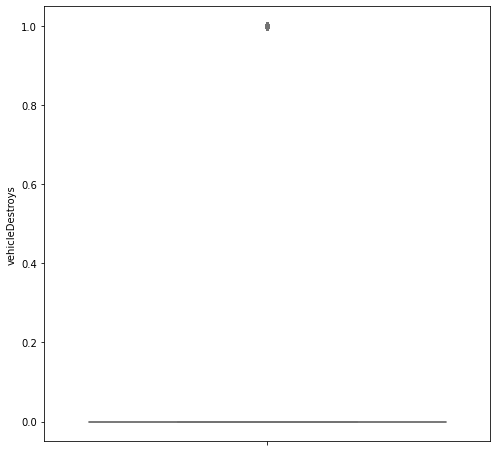

In [277]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['vehicleDestroys'],palette='rainbow')

Now there are no outliers after cleaning vehicleDestroys

<Figure size 576x576 with 0 Axes>

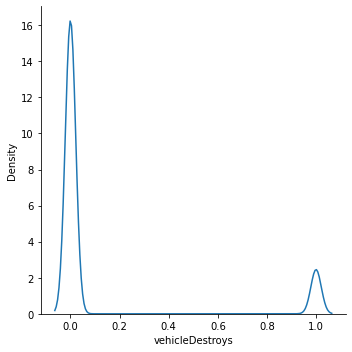

In [278]:
plt.figure(figsize=(8,8))
sns.displot(x=df['vehicleDestroys'],palette='rainbow',kind='kde')

### Analysing walkDistance
- Total distance traveled on foot measured in meters.

In [279]:
df['walkDistance'].describe()

count    1000000.000000
mean        1154.884623
std         1183.958181
min            0.000000
25%          155.500000
50%          685.800000
75%         1977.000000
max        25780.000000
Name: walkDistance, dtype: float64

In [280]:
df['walkDistance'].unique().shape

(32034,)

<Figure size 576x576 with 0 Axes>

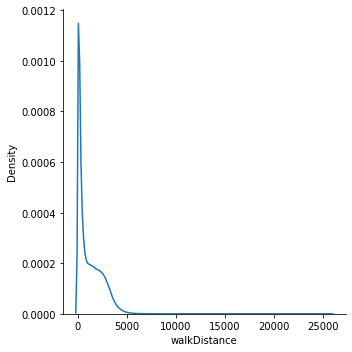

In [281]:
plt.figure(figsize=(8,8))
sns.displot(x=df['walkDistance'],palette='rainbow',kind='kde')

- Generally, the walk distance of people is 0-4200
- Maximum distance walked by any perosn is 13960.000
- Mean distance walked is 1153.282

<AxesSubplot:ylabel='walkDistance'>

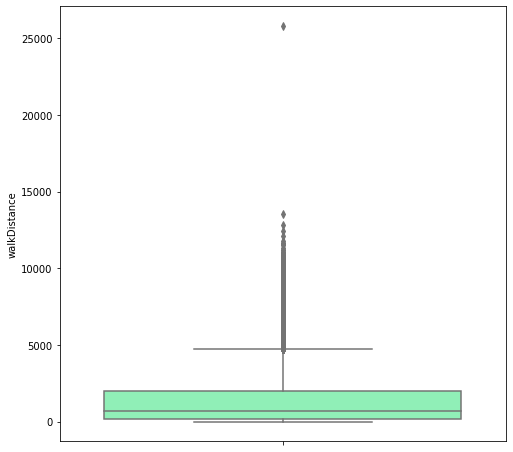

In [282]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['walkDistance'],palette='rainbow')

In [283]:
walk_outliers=iqr(df['walkDistance'])

Lower limit:  -2576.75
Upper limit:  4709.25


In [284]:
df['walkDistance']=df[(df['walkDistance']>-2574.5) & (df['walkDistance']<4704.7)]

In [285]:
df['walkDistance'].isnull().sum()

6151

In [286]:
df['walkDistance'].fillna(df['walkDistance'].median(),inplace=True)

<AxesSubplot:ylabel='walkDistance'>

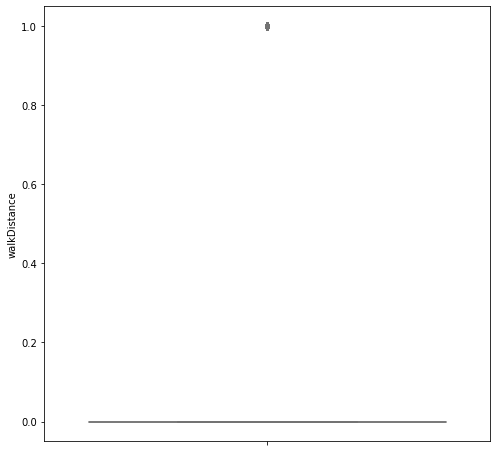

In [287]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['walkDistance'],palette='rainbow')

Now there are no outliers after cleaning walkDistance

<Figure size 576x576 with 0 Axes>

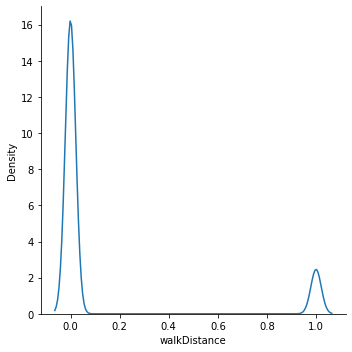

In [288]:
plt.figure(figsize=(8,8))
sns.displot(x=df['walkDistance'],palette='rainbow',kind='kde')

### Analysing weaponsAcquired
- Number of weapons picked up.

In [289]:
df['weaponsAcquired'].describe()

count    1000000.000000
mean           3.661325
std            2.458198
min            0.000000
25%            2.000000
50%            3.000000
75%            5.000000
max          128.000000
Name: weaponsAcquired, dtype: float64

In [290]:
df['weaponsAcquired'].value_counts()

3      173364
2      172970
4      154957
1      130143
5      121348
        ...  
66          1
62          1
60          1
53          1
128         1
Name: weaponsAcquired, Length: 73, dtype: int64

<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

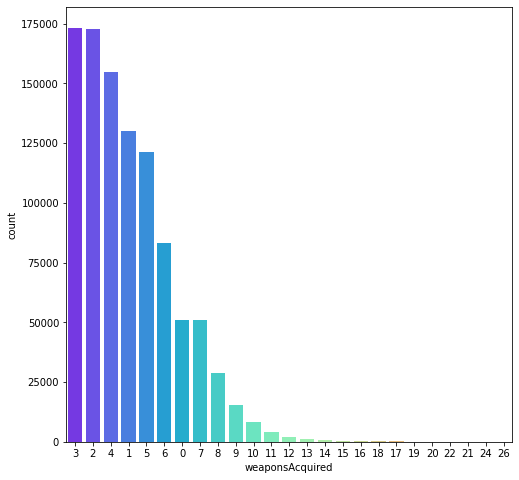

In [291]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['weaponsAcquired'],order=df['weaponsAcquired'].value_counts().iloc[:25].index,palette='rainbow')

<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

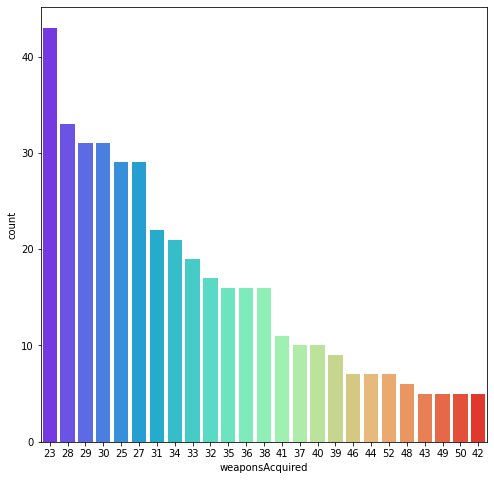

In [292]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['weaponsAcquired'],order=df['weaponsAcquired'].value_counts().iloc[25:50].index,palette='rainbow')

<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

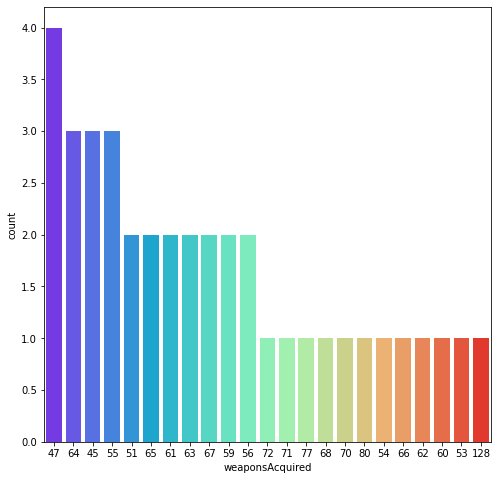

In [293]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['weaponsAcquired'],order=df['weaponsAcquired'].value_counts().iloc[50:].index,palette='rainbow')

- Generally people pick 1-5 weapons only
- Maximum weapon picked by any person is 177

<Figure size 576x576 with 0 Axes>

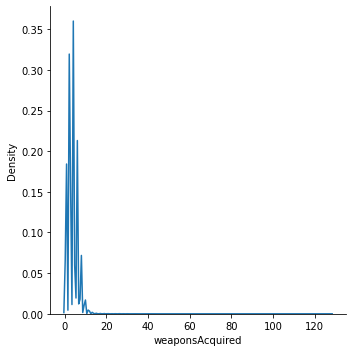

In [294]:
plt.figure(figsize=(8,8))
sns.displot(x=df['weaponsAcquired'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='weaponsAcquired'>

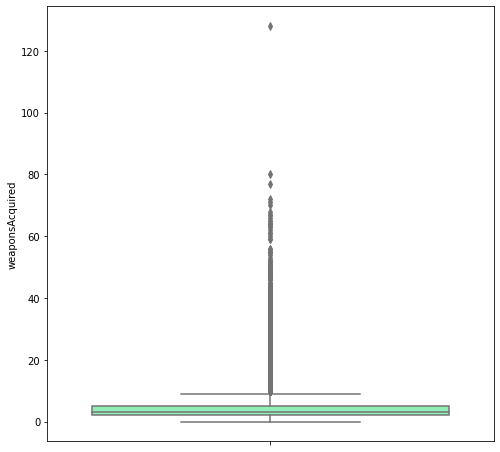

In [295]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['weaponsAcquired'],palette='rainbow')

In [296]:
weapon_outlier=iqr(df['weaponsAcquired'])

Lower limit:  -2.5
Upper limit:  9.5


In [297]:
df['weaponsAcquired']=df[(df['weaponsAcquired']>-2.5) & (df['weaponsAcquired']<9.5)]

In [298]:
df['weaponsAcquired'].fillna(df['weaponsAcquired'].median(),inplace=True)

<AxesSubplot:ylabel='weaponsAcquired'>

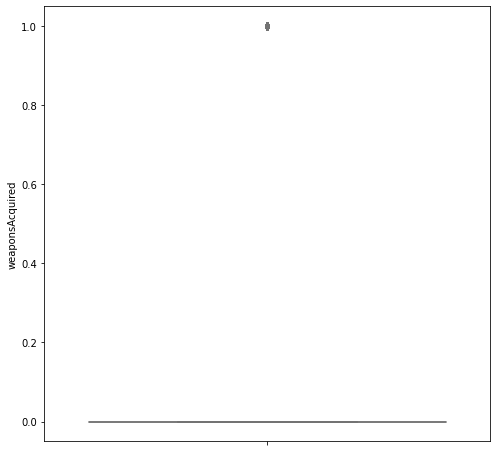

In [299]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['weaponsAcquired'],palette='rainbow')

Now, there are no outliers after cleaning the weaponsAcquired

<Figure size 576x576 with 0 Axes>

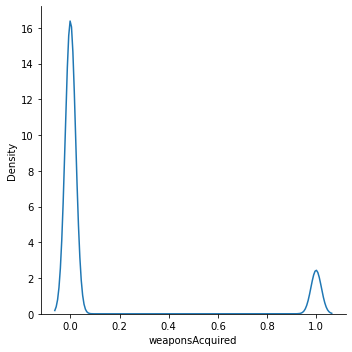

In [300]:
plt.figure(figsize=(8,8))
sns.displot(x=df['weaponsAcquired'],palette='rainbow',kind='kde')

### Analysing winPoints
- Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

In [302]:
df['winPoints'].describe()

count    1000000.000000
mean         608.039430
std          740.044477
min            0.000000
25%            0.000000
50%            0.000000
75%         1495.000000
max         2001.000000
Name: winPoints, dtype: float64

In [303]:
df['winPoints'].unique().shape

(1123,)

<Figure size 576x576 with 0 Axes>

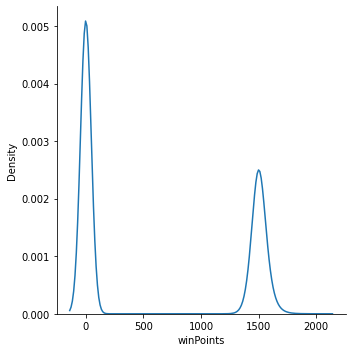

In [304]:
plt.figure(figsize=(8,8))
sns.displot(x=df['winPoints'],palette='rainbow',kind='kde')

- Win points id generally between 0-250 and 1250-1800
- Maximum winpoints is 2002.000
- % of people with 0 winpoints are 59.76485551503856%

In [305]:
win_0=df['winPoints'].value_counts()[0]/df['winPoints'].shape[0]*100
print(f"% of people with 0 winpoints are {win_0}%")

% of people with 0 winpoints are 59.614900000000006%


<AxesSubplot:ylabel='winPoints'>

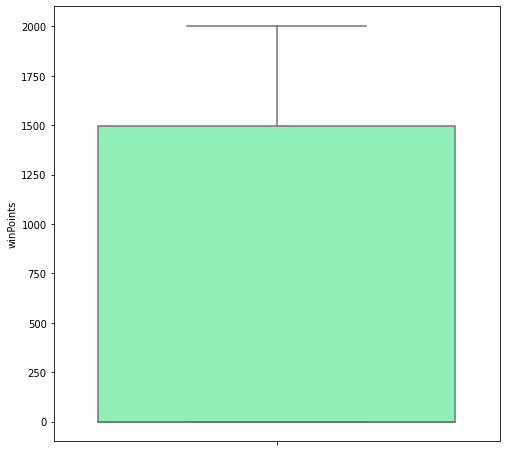

In [306]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['winPoints'],palette='rainbow')

There are no outliers in winPoints

### Analysing winPlacePerc
- The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [307]:
df['winPlacePerc'].describe()

count    1000000.000000
mean           0.472763
std            0.307481
min            0.000000
25%            0.200000
50%            0.458300
75%            0.740700
max            1.000000
Name: winPlacePerc, dtype: float64

In [308]:
df['winPlacePerc'].unique().shape

(2521,)

<Figure size 576x576 with 0 Axes>

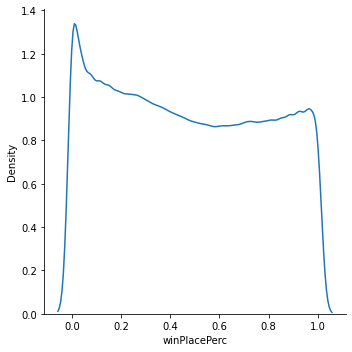

In [309]:
plt.figure(figsize=(8,8))
sns.displot(x=df['winPlacePerc'],palette='rainbow',kind='kde')

- winPlacePer range between 0 and 1
- % of people having 1 win percentage are 2.8651431717071048%

In [310]:
winP_1=df['winPlacePerc'].value_counts()[1]/df['winPlacePerc'].shape[0]*100
print(f"% of people having 1 win percentage are {winP_1}%")

% of people having 1 win percentage are 2.8594%


<AxesSubplot:ylabel='winPlacePerc'>

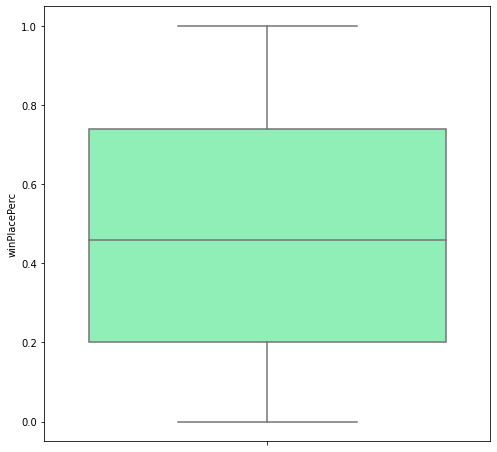

In [311]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['winPlacePerc'],palette='rainbow')

There are no outliers in winPlacePerc